## LEAD SCORING CASE STUDY
#### In this case study, we need to identify the number of converted leads and how much lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads. We need to assign a lead score to each of the leads such that the customer with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

In [1]:
#suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:


import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## STEP 1: Loading and Inspecting the Data

In [4]:
#importing all datasets
lead_data = pd.read_csv("Leads.csv")
lead_data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


### Inspecting the Dataframe

In [5]:
#lets check the first 5 rows of the dataframe using .head() command
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#To check the dimension or shape of dataframe = rows x columns
lead_data.shape

(9240, 37)

In [7]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
#.describe() is used to define statistical summary or simply to find the numeric values like mean, median, count, minimum vale, maximum value, standard deviation.
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Observation : 

According to above statistical summary, there is a significant difference between the minimum value and maximum value of column "total visits", "total time spent on website", "page views per visit". This shows there are outliers present in these attributes. 

In [9]:
#Lets find out the entire column wise information about the lead dataframe which helps in inspecting the dataframe and tells the number of null values present in the column and their respective datatypes
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Observation: 

Out of 37 columns, 16 columns  have null values.  Lead  Quality column has maximum null values and the Last Activity column has least null values.

## STEP 2 : Data Quality Check and Data Cleaning

In [10]:
lead_data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

Observation : There are 30 categorical columns and 7 numerical columns.Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.


In [11]:
#checking for duplicates in a subset of columns, replacing None with actual column name
lead_data.drop_duplicates(subset=None, inplace=True)

In [12]:
lead_data.shape

(9240, 37)

Observation : The dimension of dataframe before and after removing duplicates are same.This shows there are no duplicate rows are present.

In [13]:
#Determining all the columns which have 'Select' level.
cols = list(lead_data.columns)
for i in cols:
    if 'Select' in lead_data[i].values:
        print(i)


Specialization
How did you hear about X Education
Lead Profile
City


Observation:These 4 columns Specialization,How did you hear about X Education,Lead Profile and City have 'Select' levels. This shows that leads have not opted for any level or not selected any option while filling enquiry form. We can replace it with null.

In [14]:
#converting 'Select' into 'Nan'
lead_data=lead_data.replace('Select',np.nan)
lead_data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [15]:
#rechecking the columns with 'Select' level
cols = list(lead_data.columns)
for i in cols:
    if 'Select' in lead_data[i].values:
        print(i)


In [16]:
lead_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

#### Observation : 
'Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque' These columns have a unique value i.e. "No"

In [17]:
#Dropping all the columns which have unique values
lead_data=lead_data.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)
lead_data

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,Will revert after reading the email,High in Relevance,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,wrong number given,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,invalid number,Not Sure,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,NaN,NaN,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,SMS Sent


#### Observation : 
We can observe that 5 columns are dropped and now we are left with 32 columns

In [18]:
#Dropping 2 more columns as they are just an ID number, not important as analysis point of view and have all 9240 unique values.
lead_data=lead_data.drop(['Prospect ID','Lead Number'],axis=1)
lead_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,Will revert after reading the email,High in Relevance,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,wrong number given,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,invalid number,Not Sure,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,NaN,NaN,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,SMS Sent


Now, we are left with 30 columns

In [19]:
#Checking number of null values present
lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [20]:
#checking null value percentage in each column
round(100*lead_data.isnull().sum()/len(lead_data),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [21]:
#Dropping columns with more than 35% null values
lead_data = lead_data.drop(['How did you hear about X Education','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)
lead_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,...,NaN,NaN,No,No,No,No,No,No,No,SMS Sent


In [22]:
#rechecking null value percentage in each column
round(100*lead_data.isnull().sum()/len(lead_data),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

#### Observation : 
Here, we have dropped all the columns which have more than 35% null values, except Specialization as it is one important feauture for analysis.The other columns like 'country','What is your current occupation','What matters most to you in choosing a course' have less missing values but dropping rows of these column will cause a lot of data loss.

In [23]:
#dropping one more column last notable activity as it is similar to last activity and is not very relevant
lead_data.drop(['Last Notable Activity'],axis=1,inplace=True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No


#### Missing Value Treatment

In [24]:
#Checking the value counts of country column
lead_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

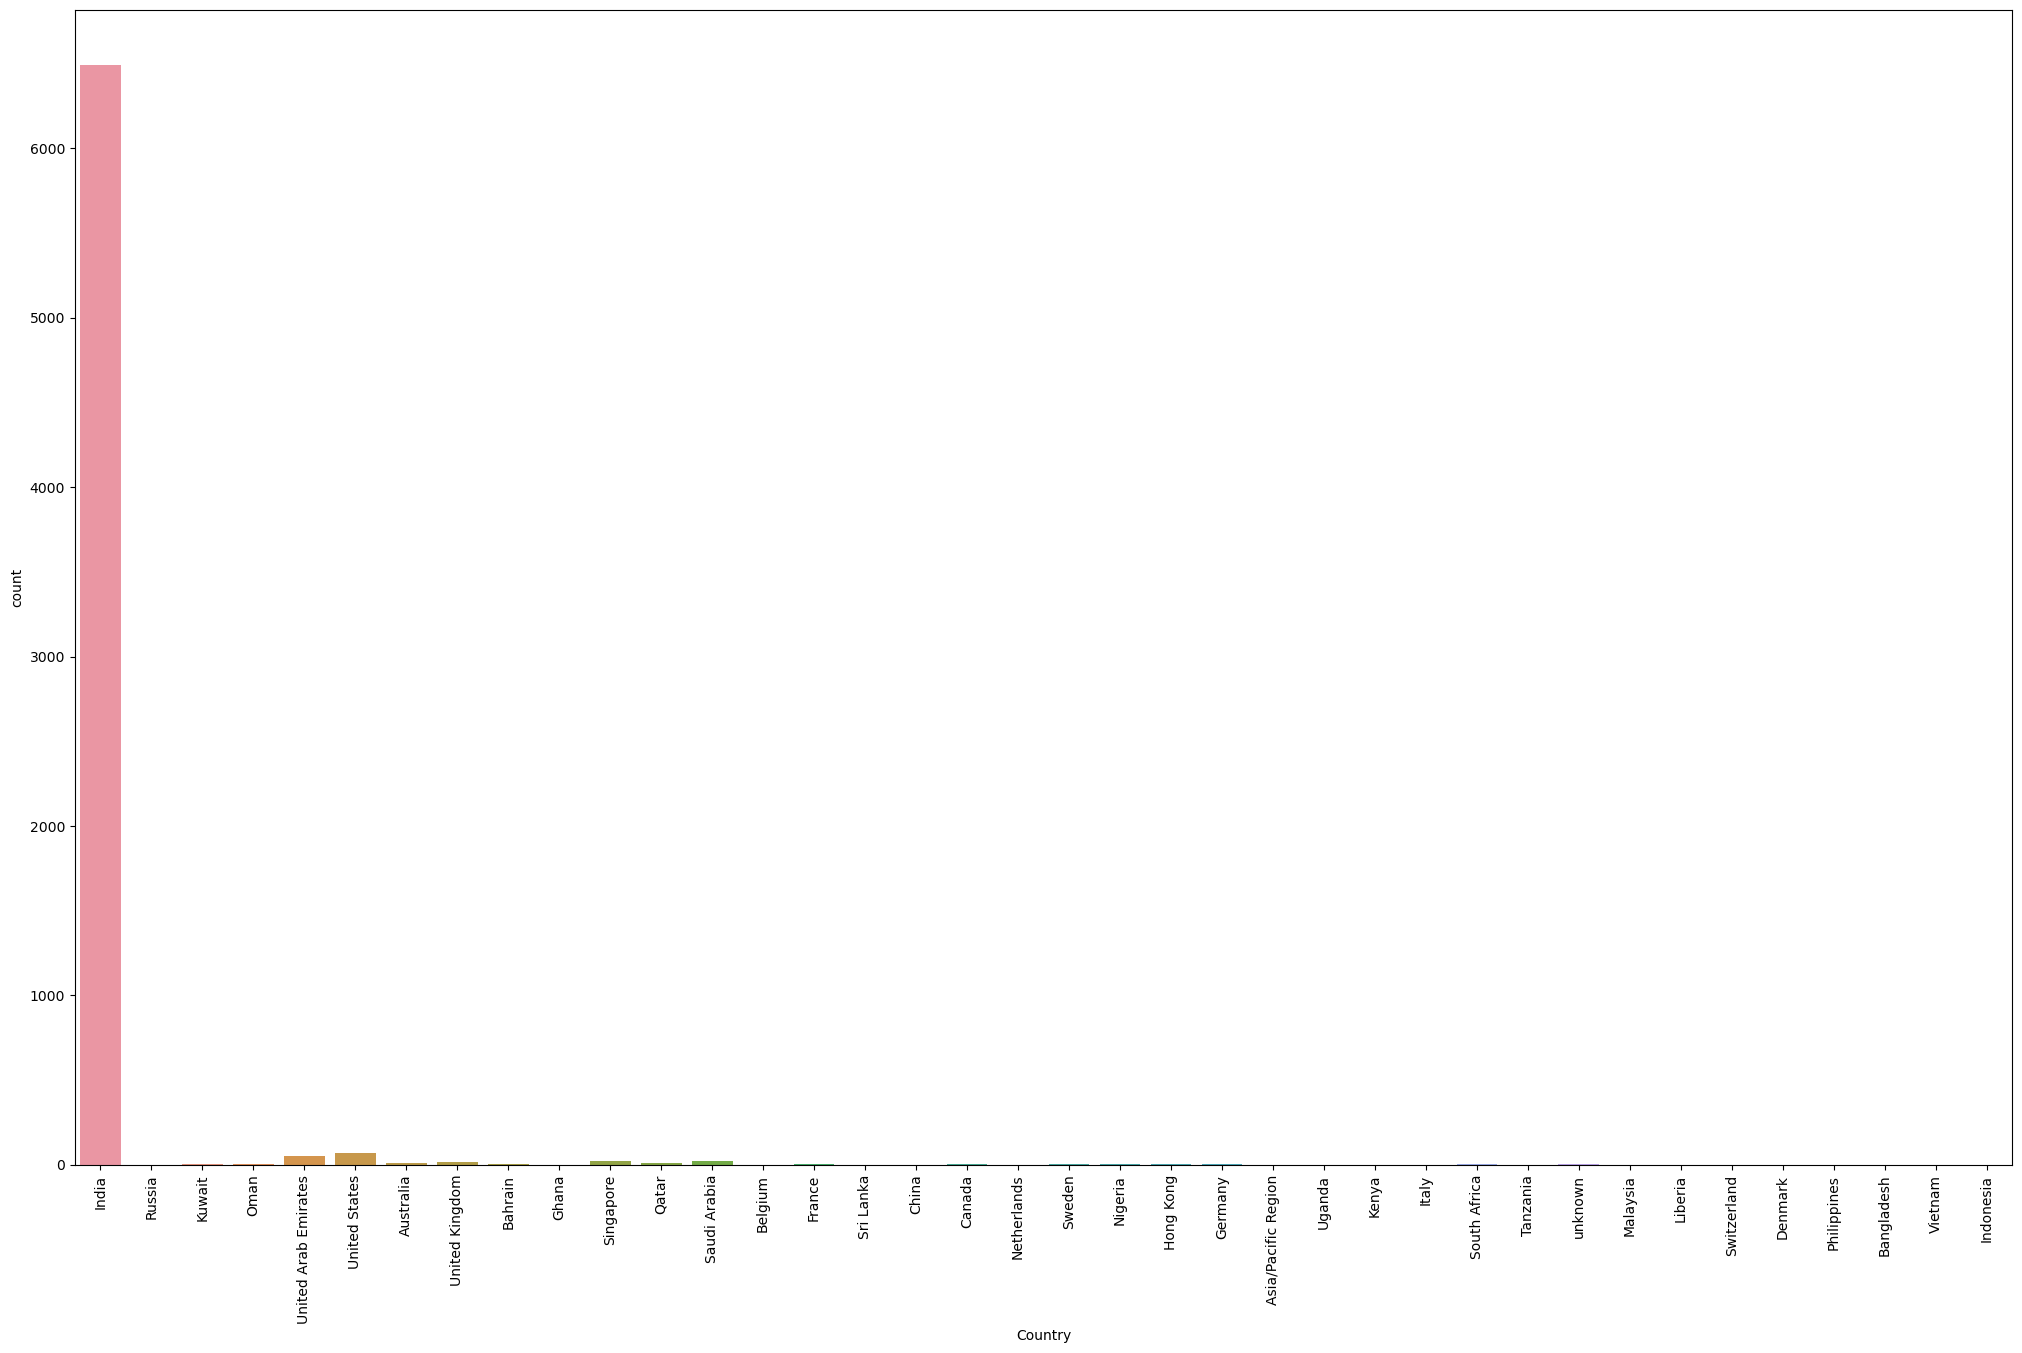

In [25]:
#Plotting the count plot to check the data distribution of "Country" column.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['Country'])
plt.xticks(rotation = 90)
plt.show()


Observation :  India is the most frequent value and has the highest count so we will impute the missing values with this.

In [26]:
#Imputing missing values with India
lead_data.Country.fillna('India',inplace=True)
lead_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,No


In [27]:
lead_data['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#### Observation : 
We can the see the count of India is increased from 6492 to 8953.

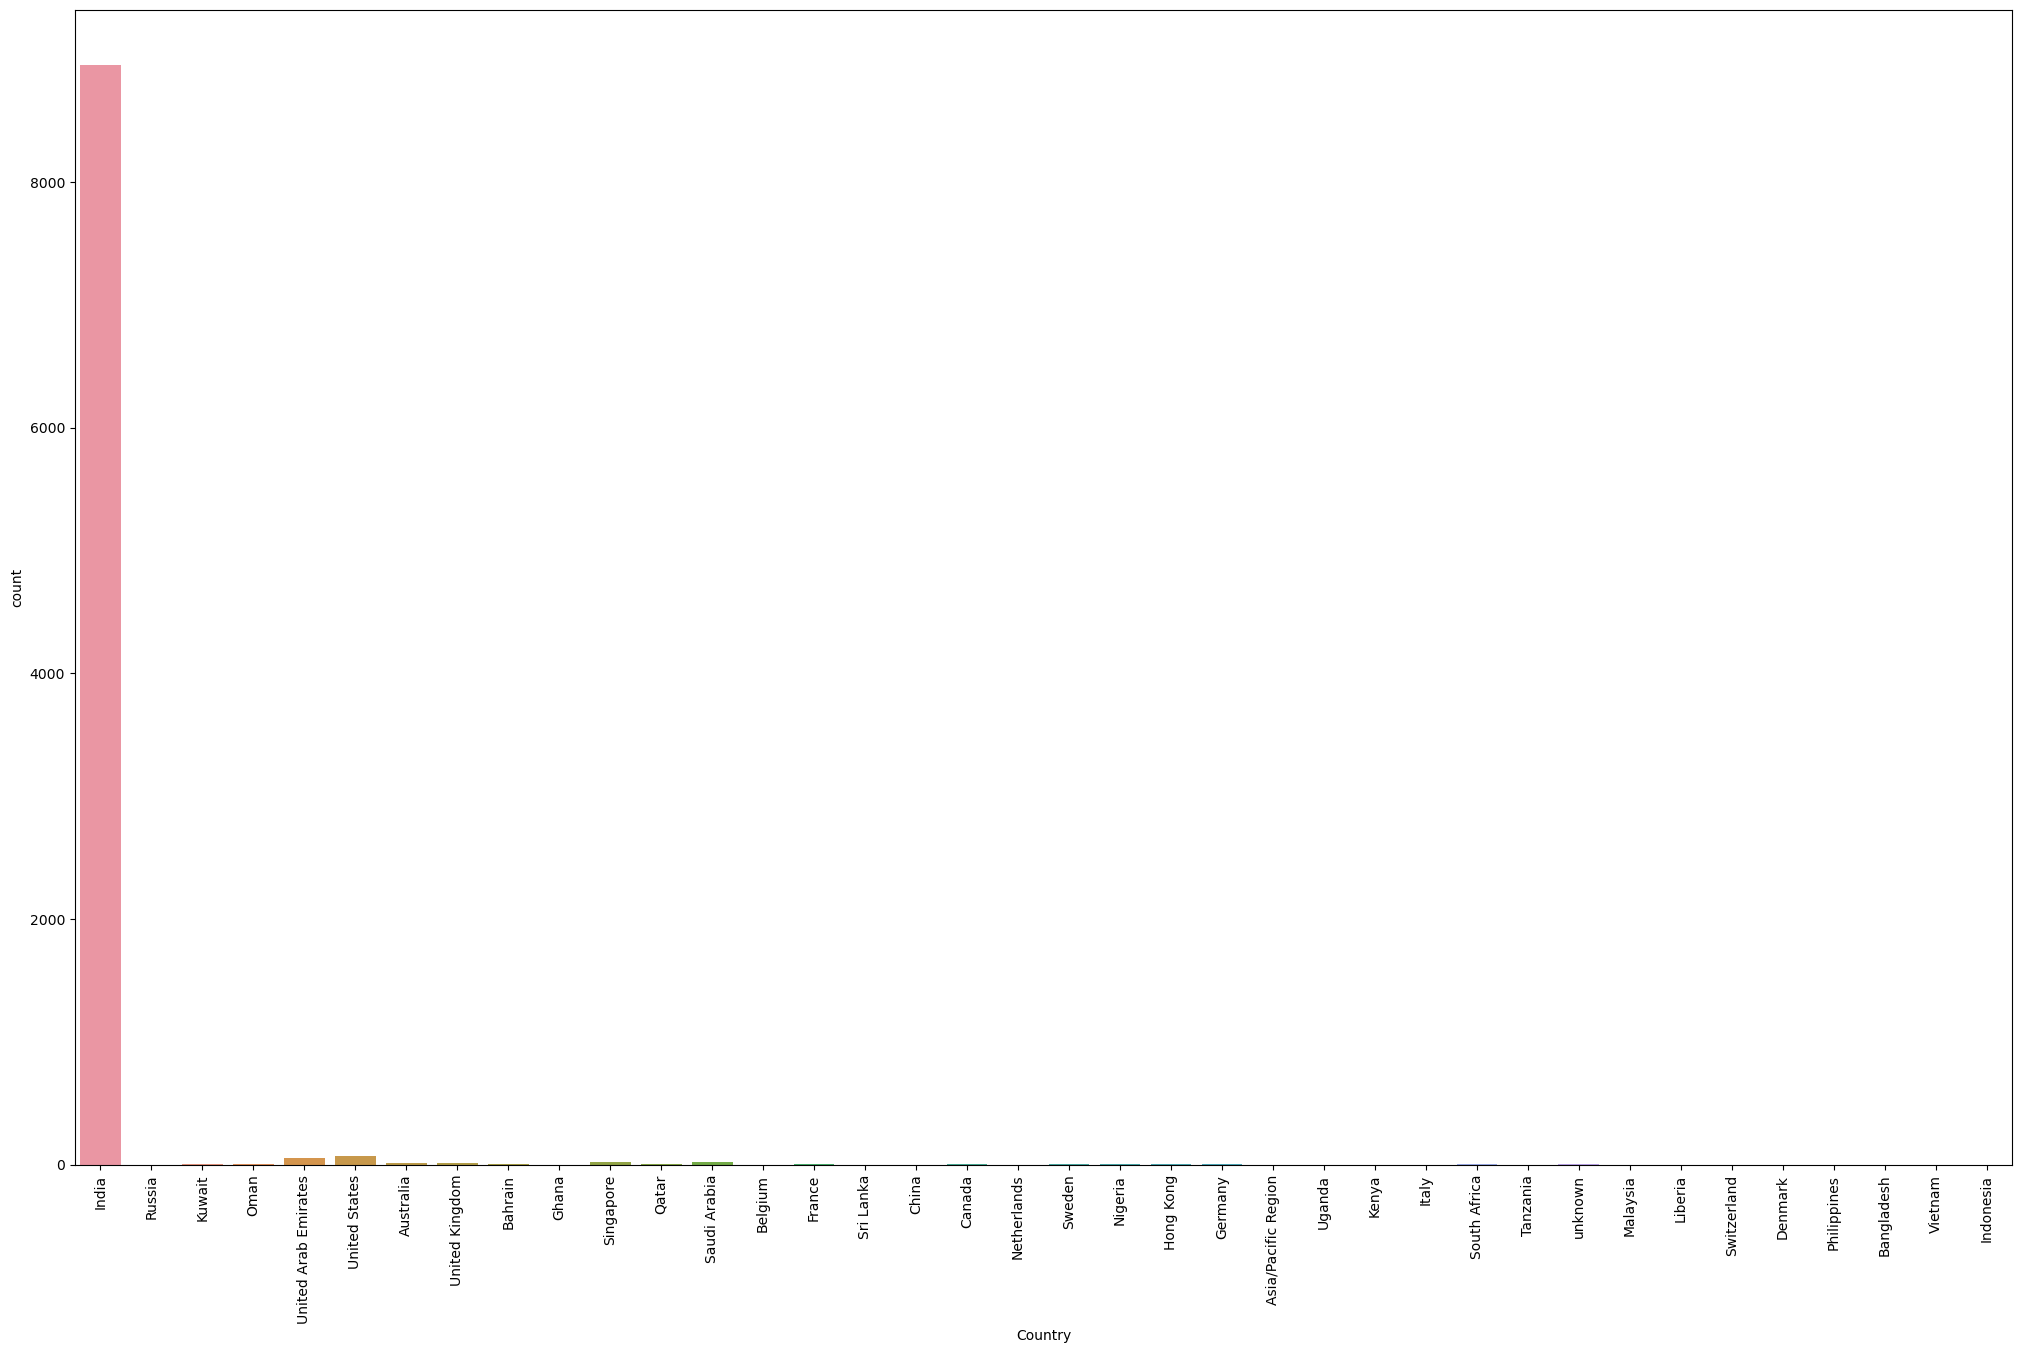

In [28]:
#Plotting the count plot to check the data distribution of "Country" column after imputation.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['Country'])
plt.xticks(rotation = 90)
plt.show()

#### Observation : 
We observed that almost 96.89% values are India,it will not contribute much in analysis so we can drop this column

In [29]:
#Lets drop the 'country' column
lead_data = lead_data.drop(['Country'],axis=1)
lead_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,NaN,NaN,No,No,No,No,No,No,No


In [30]:
round(100*lead_data.isnull().sum()/len(lead_data),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

In [31]:
#Checking the value counts of Specialization column
lead_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

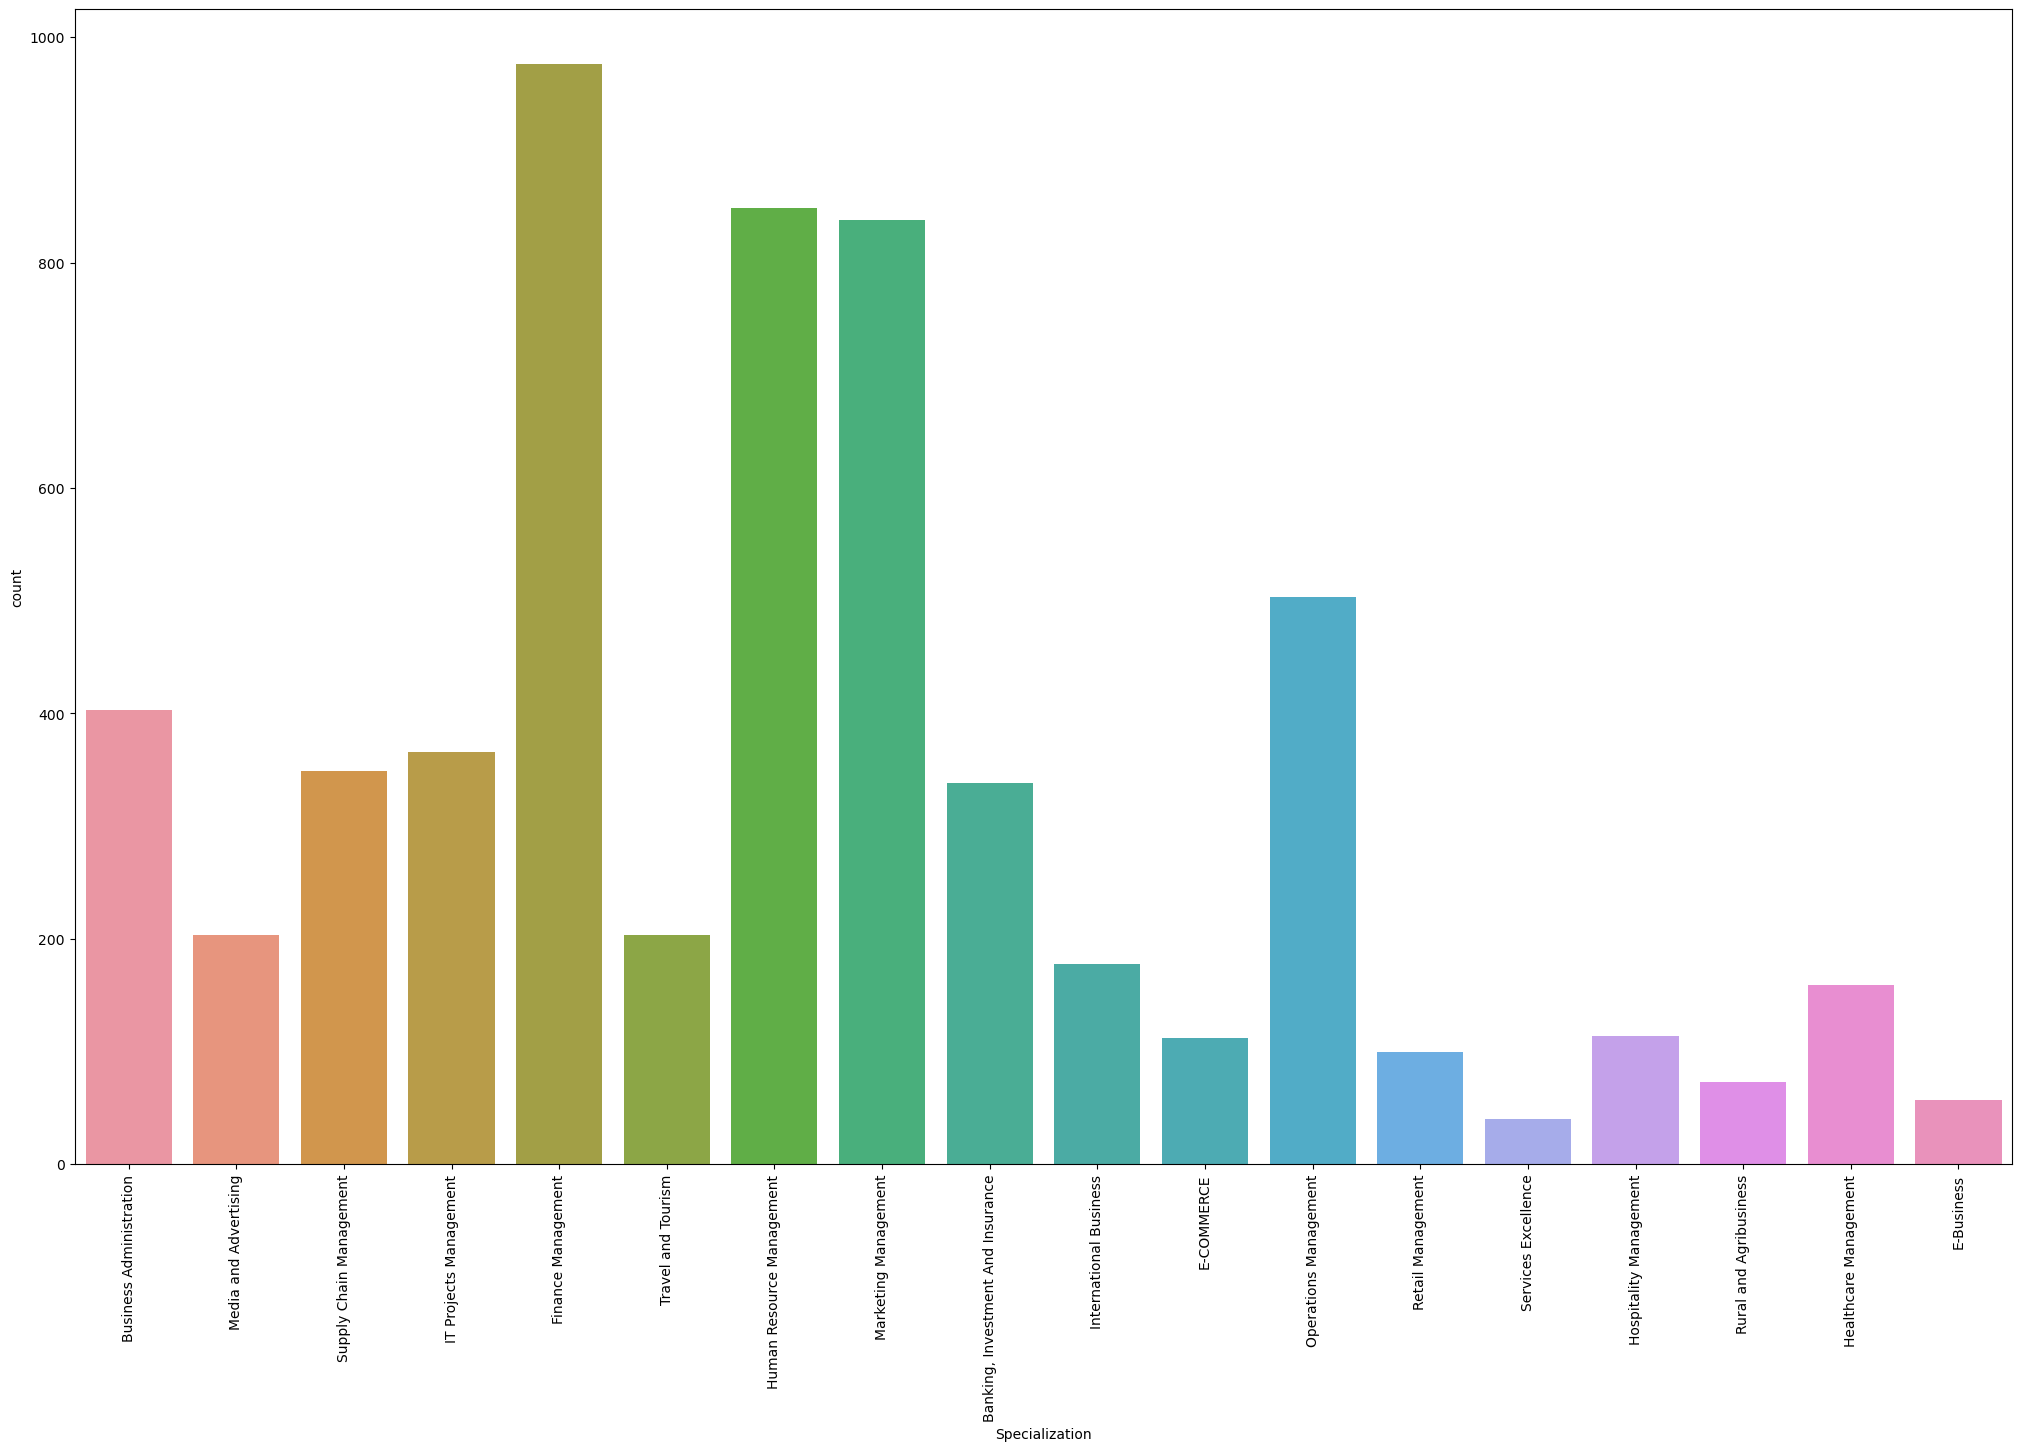

In [32]:
#Plotting the count plot to check the data distribution of "Specialization" column.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['Specialization'])
plt.xticks(rotation = 90)
plt.show()

#### Observation :  
We can see that the specialization with Finance Management has higher number of leads,so this is a significant variable and cannot be dropped.

In [33]:
#Imputing missing values with Other, as it is an important feature and there is no trend across categories to be able to impute it with an existing value, hence creating a new category as "Others".
lead_data.Specialization.fillna('Others',inplace=True)
lead_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,NaN,NaN,No,No,No,No,No,No,No


In [34]:
lead_data['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

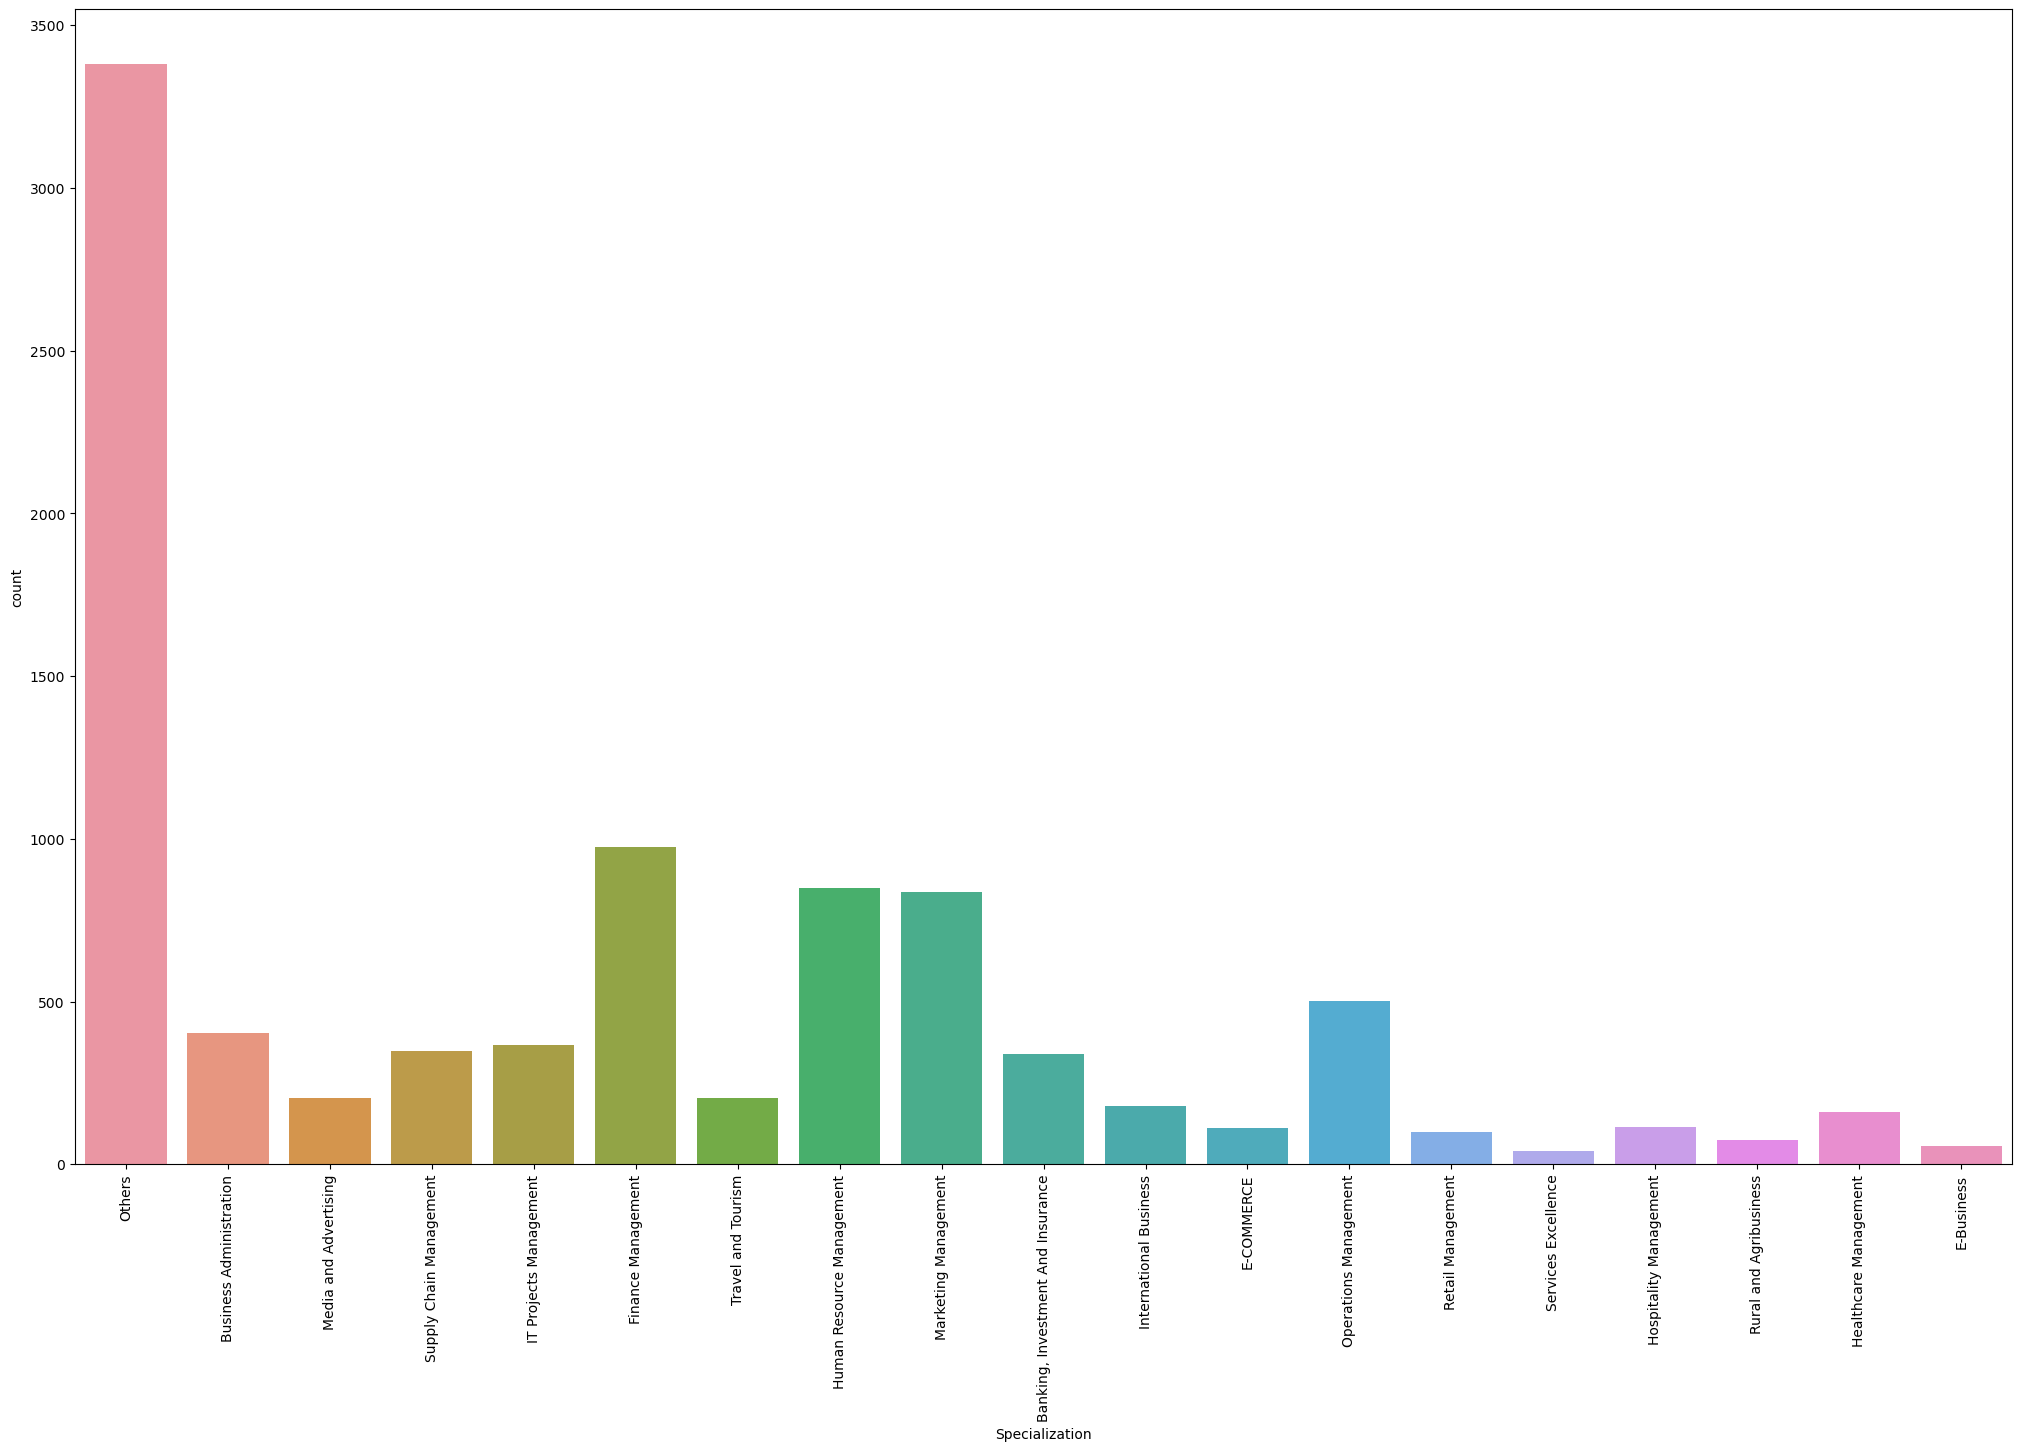

In [35]:
#Plotting the count plot to check the data distribution of "Specialization" column after imputation.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['Specialization'])
plt.xticks(rotation = 90)
plt.show()

In [36]:
round(100*lead_data.isnull().sum()/len(lead_data),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

In [37]:
#Checking the value counts of "What is your current occupation" column
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

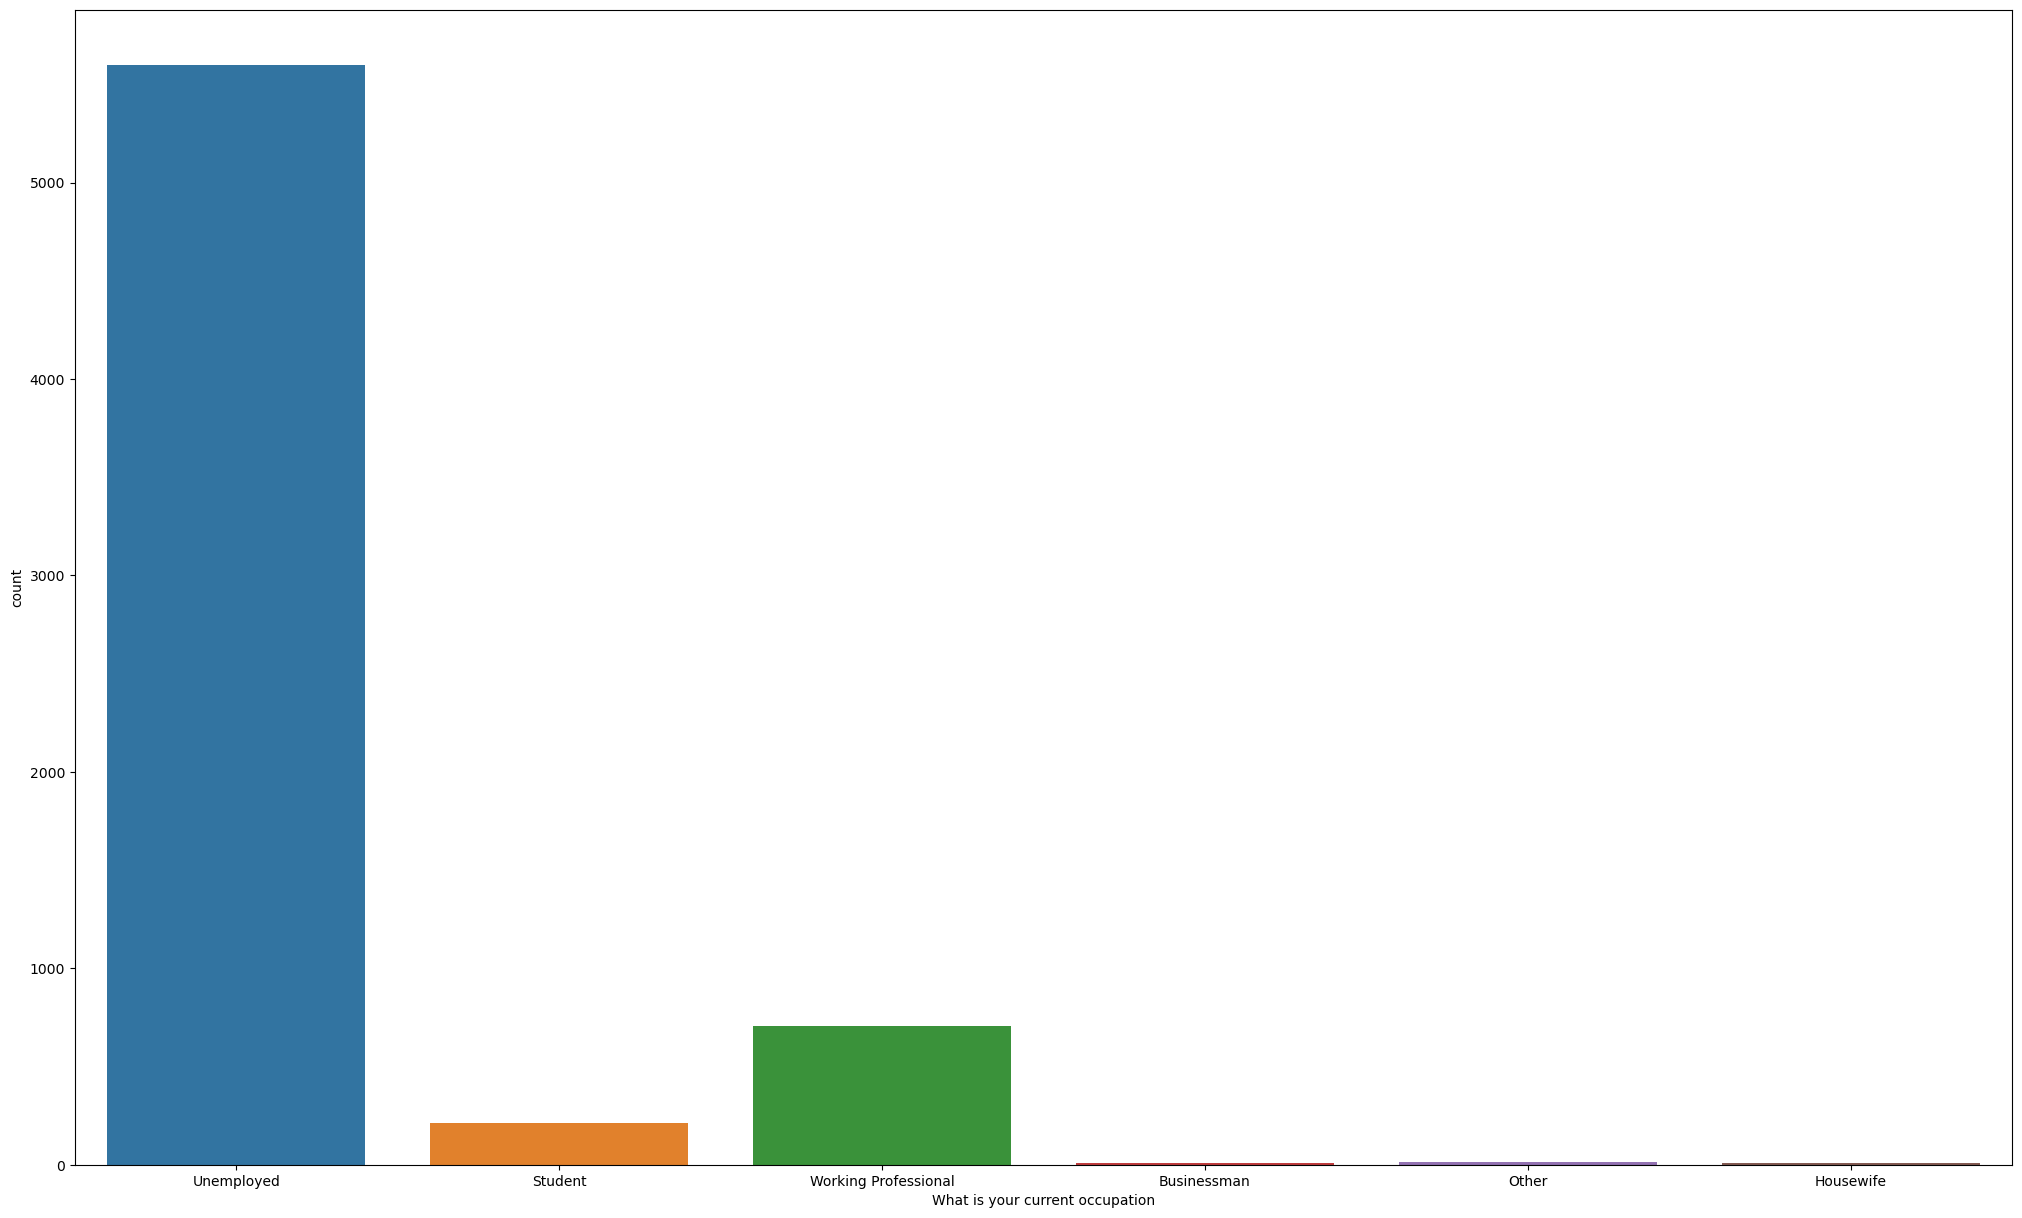

In [38]:
#Plotting the count plot to check the data distribution of "What is your current occupation" column.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['What is your current occupation'])
plt.show()

#### Observation : 
We observe that the unemployed are highest in number followed by working professional. But we will impute the missing values with 'Other' not with 'Unemployed' as we dont know the occupation of other leads.

In [39]:
#Imputing missing values with 'Other'
lead_data['What is your current occupation'].fillna('Other',inplace=True)
lead_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other,NaN,No,No,No,No,No,No,No


In [40]:
lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

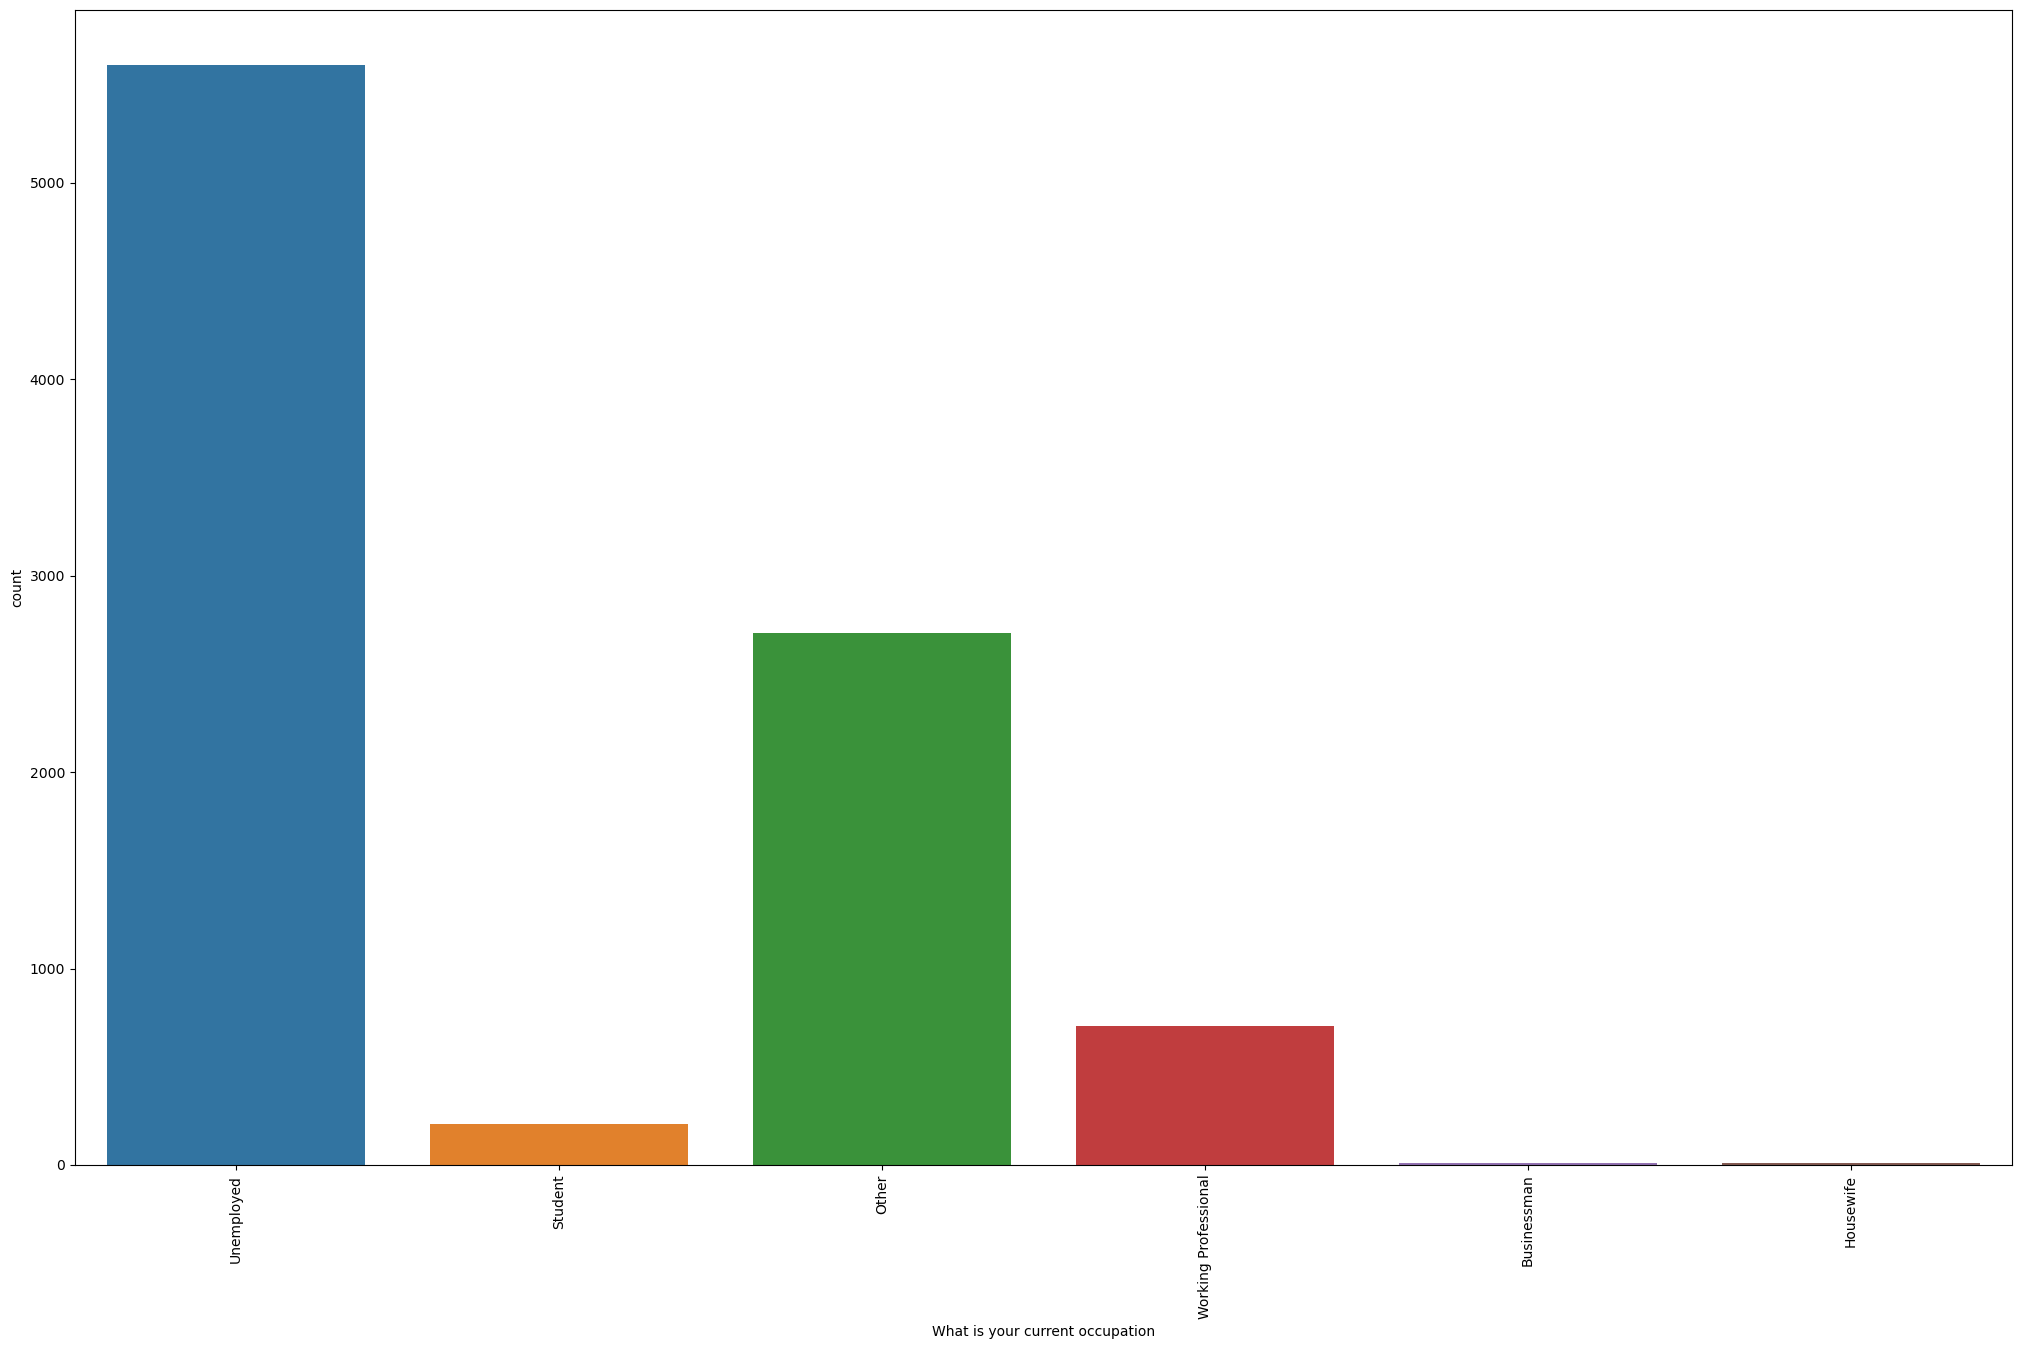

In [41]:
#Plotting the count plot to check the data distribution of "What is your current occupation" column after imputation.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['What is your current occupation'])
plt.xticks(rotation = 90)
plt.show()

In [42]:
round(100*lead_data.isnull().sum()/len(lead_data),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
A free cop

In [43]:
#Checking the value counts of What matters most to you in choosing a course column
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

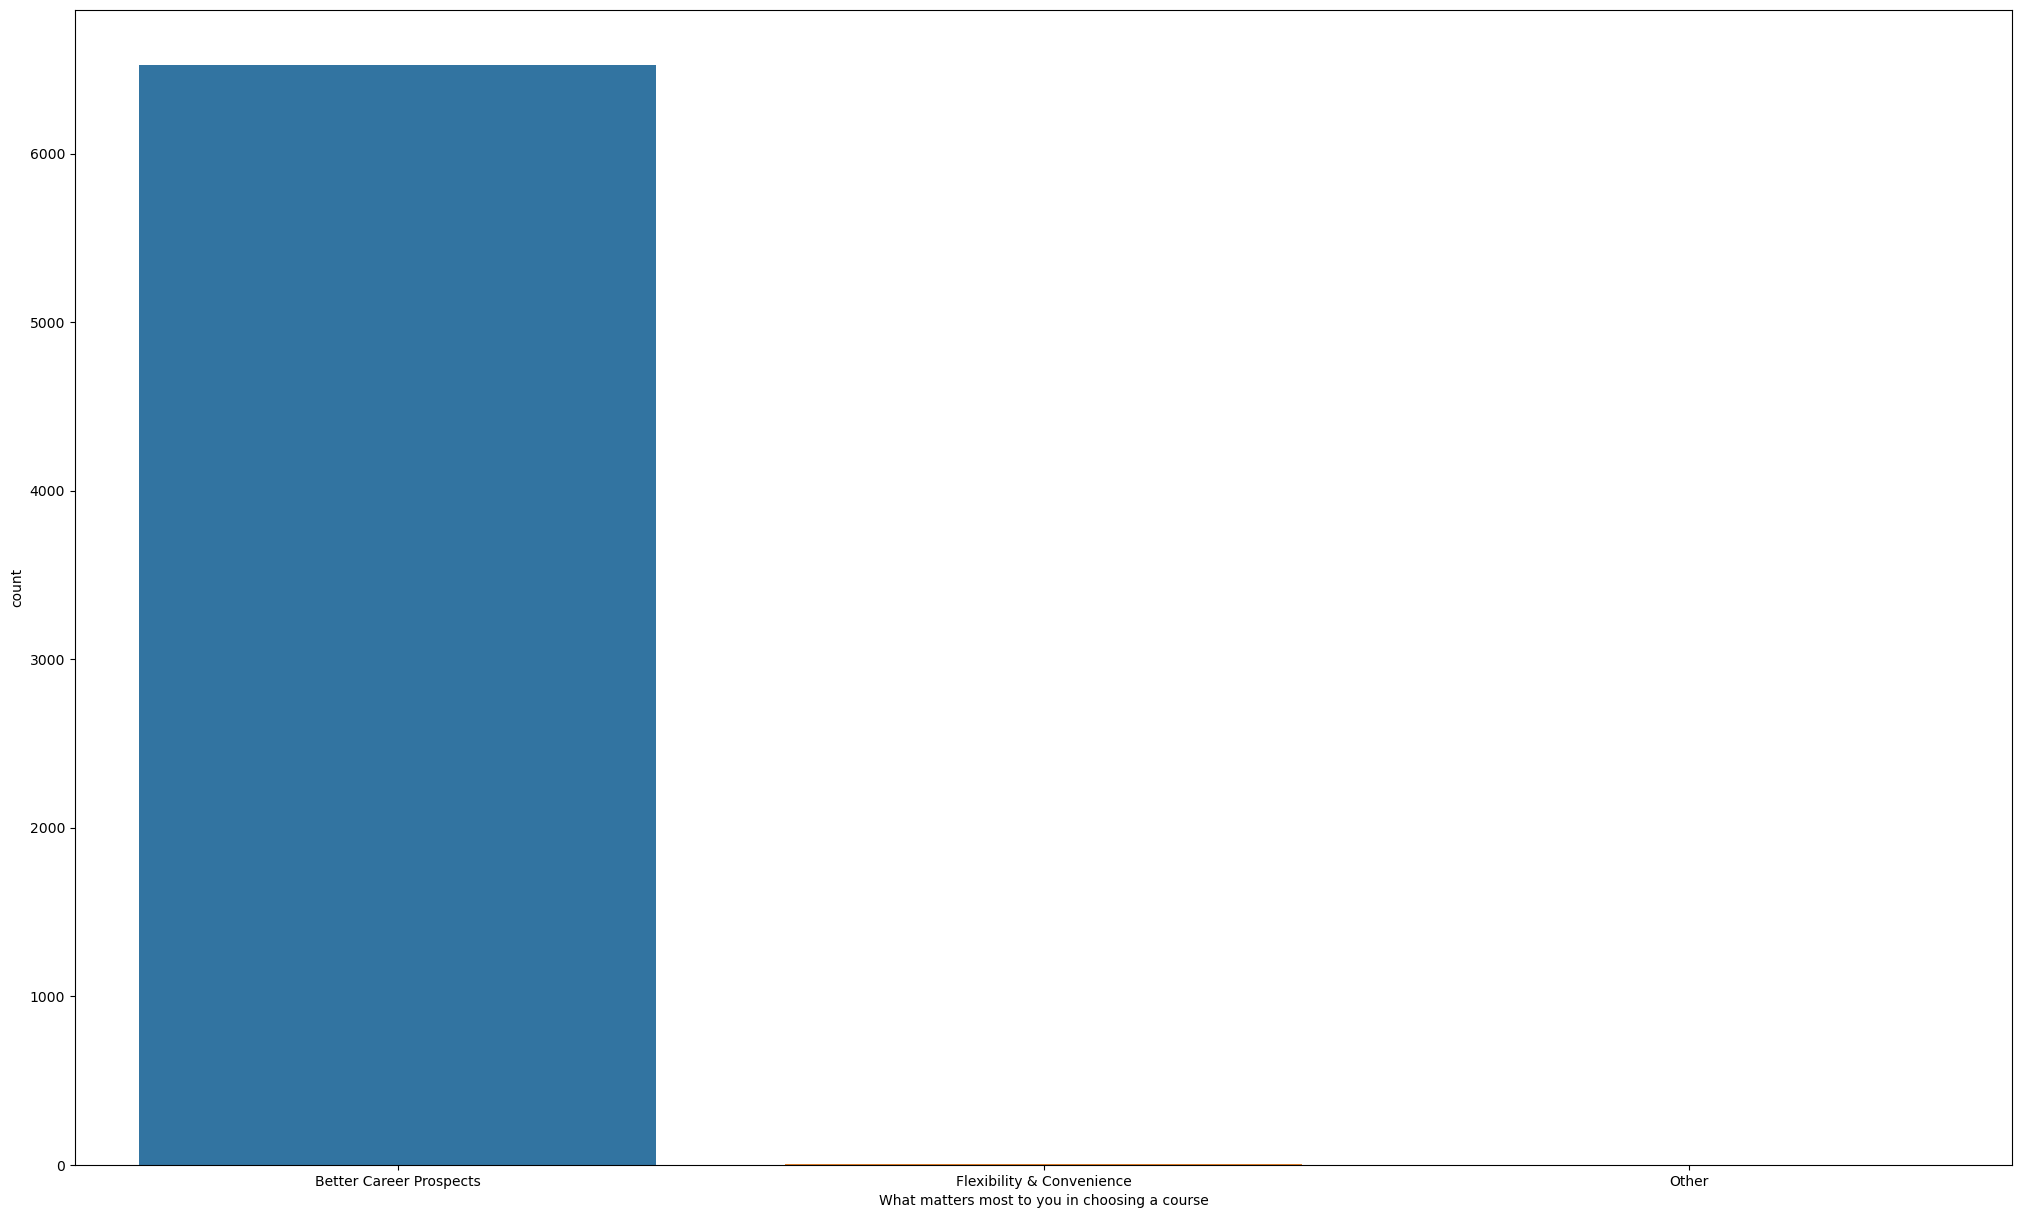

In [44]:
#Plotting the count plot to check the data distribution of "What matters most to you in choosing a course" column.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['What matters most to you in choosing a course'])
plt.show()

Observation : Better Career Prospect is the most frequent value and has the highest count. So we will impute the missing values with this.

In [45]:
#Imputing missing values with "Better Career Prospects" 
lead_data['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)
lead_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other,Better Career Prospects,No,No,No,No,No,No,No


In [46]:
lead_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

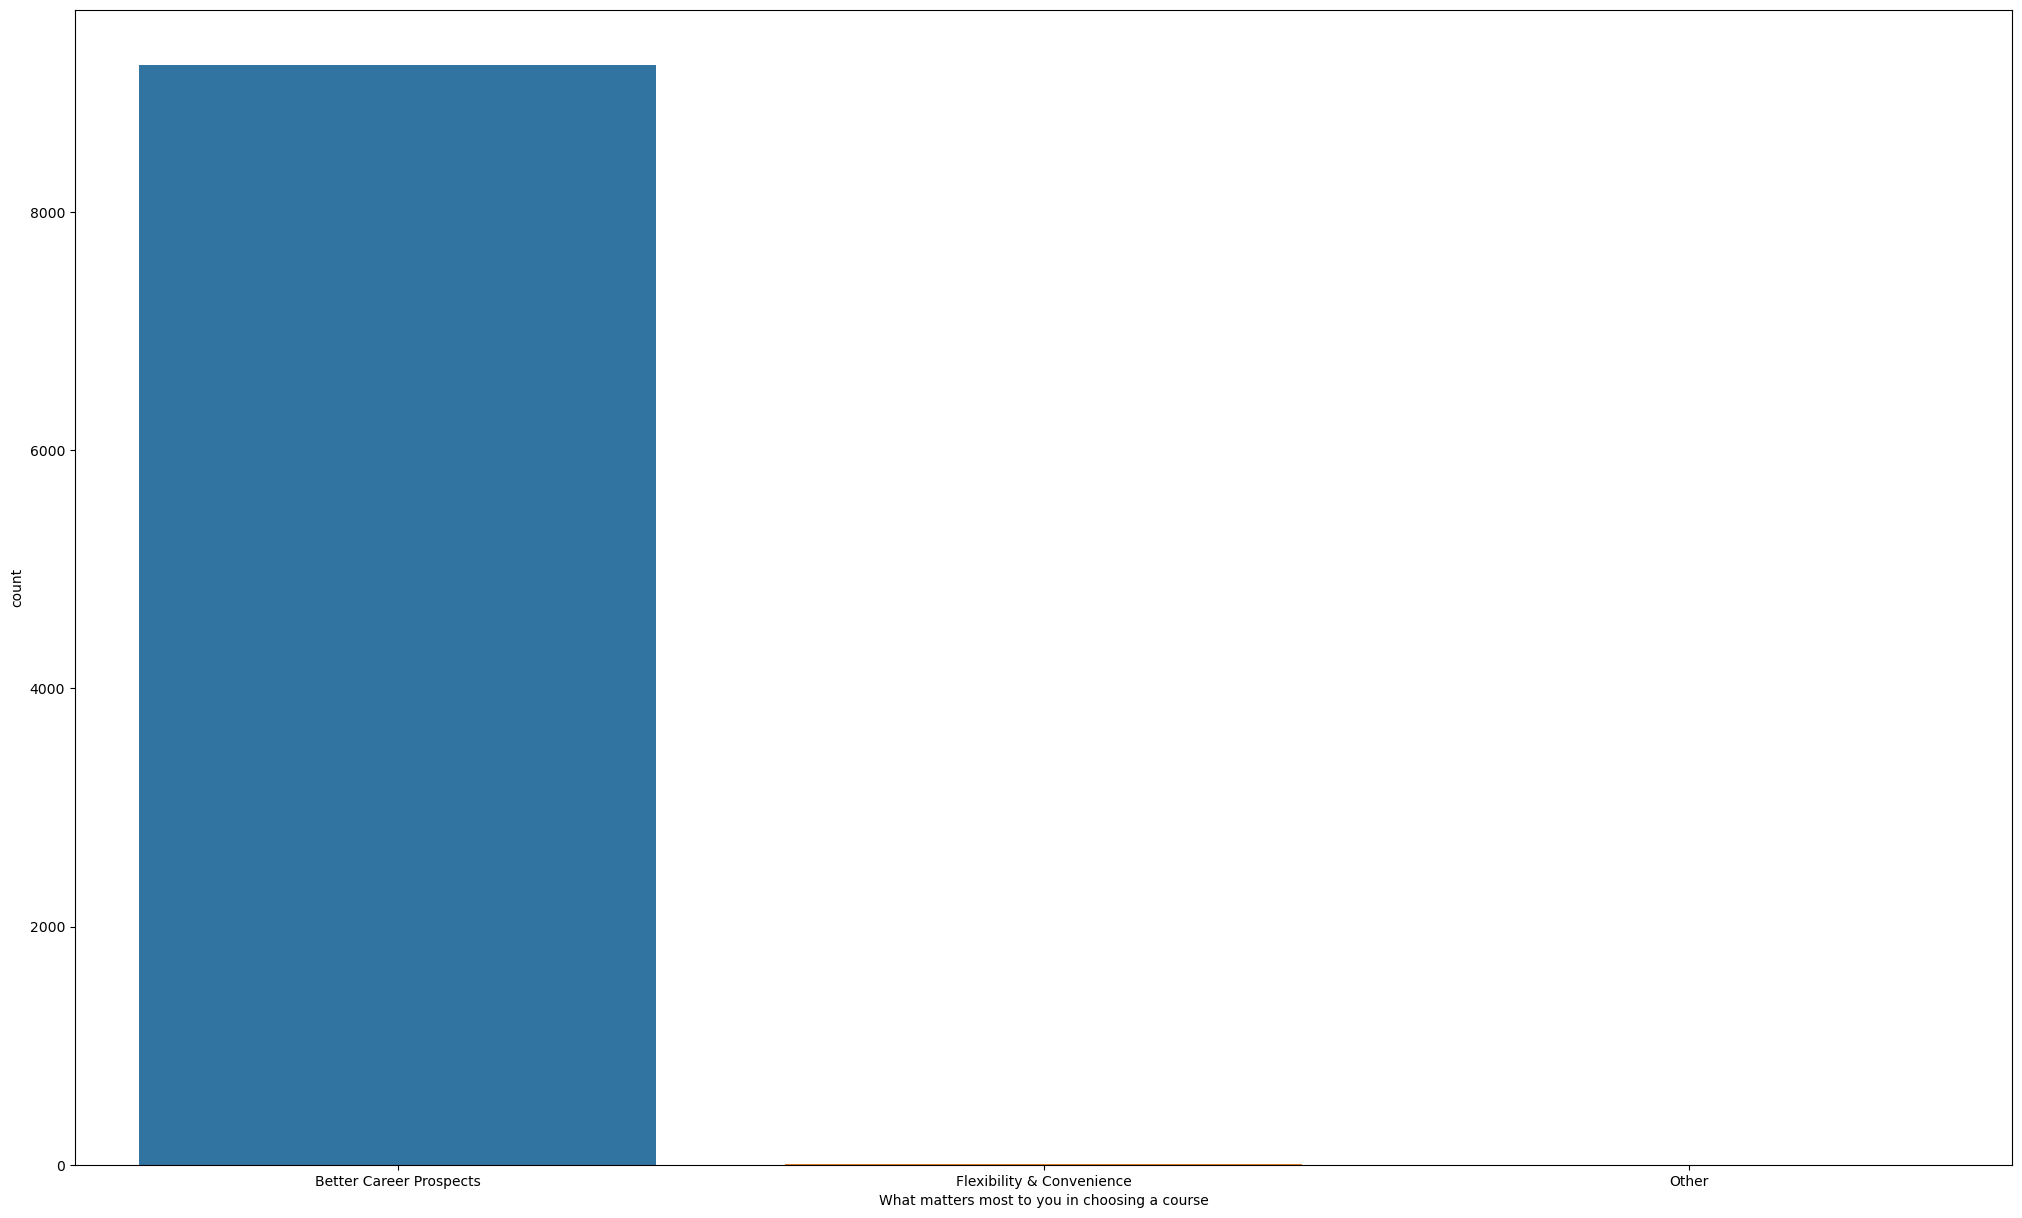

In [47]:
#Plotting the count plot to check the data distribution of "What matters most to you in choosing a course" column after imputation.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['What matters most to you in choosing a course'])
plt.show()

In [48]:
round(100*lead_data.isnull().sum()/len(lead_data),2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The

In [49]:
#Checking the value counts of Lead Source column
lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

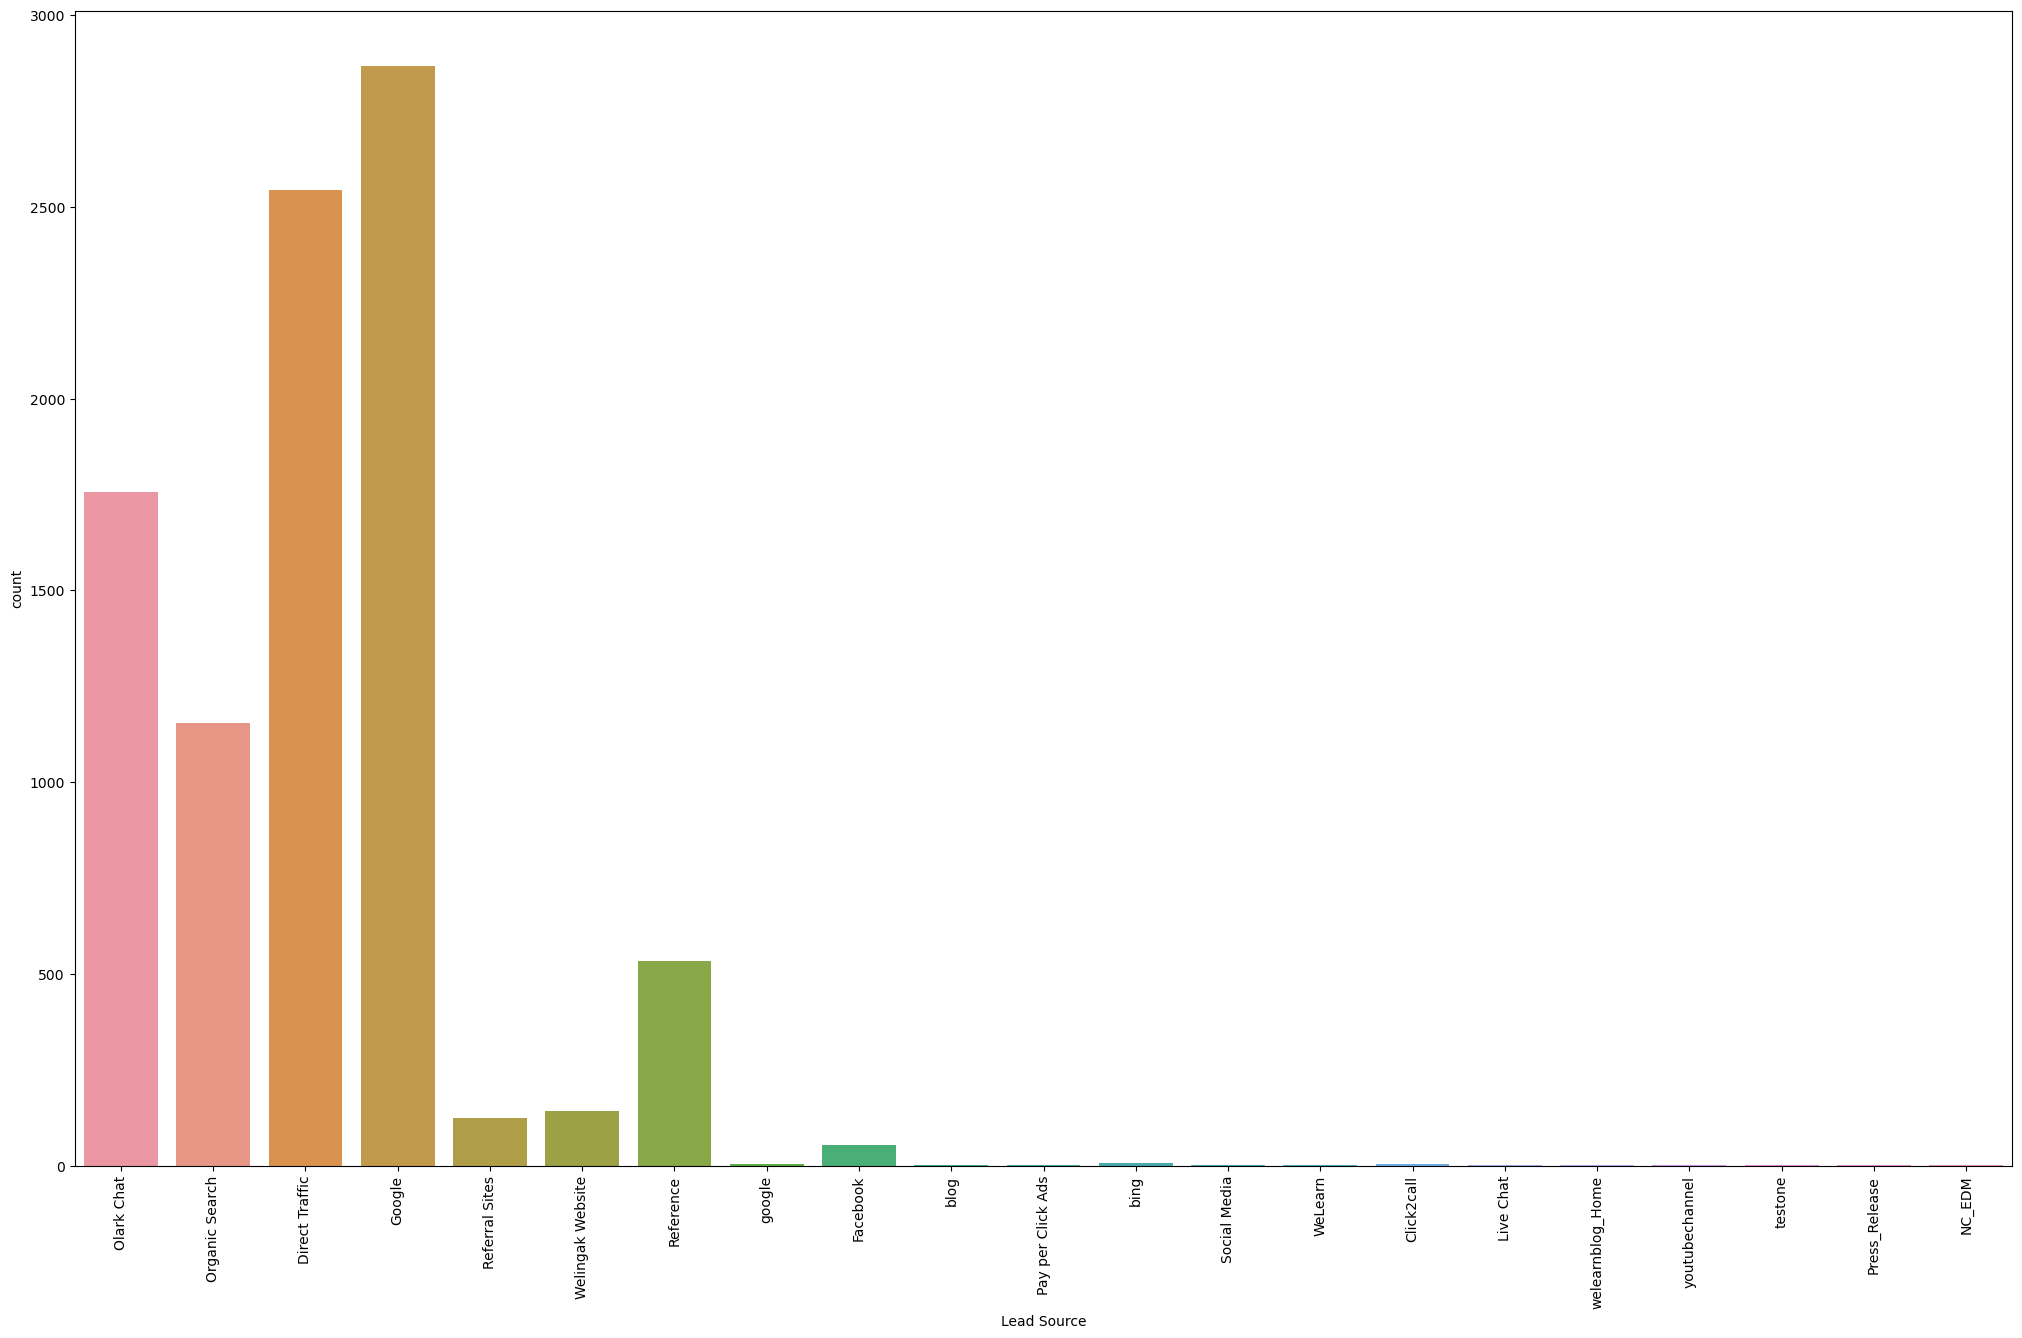

In [50]:
#Plotting the count plot to check the data distribution of "Lead Source" column.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['Lead Source'])
plt.xticks(rotation = 90)
plt.show()

Obseravtion : We observe that Google is the most frequent value and has the highest count. Also there are two 'google' and 'Google', so it is better to replace it.

In [51]:
#Imputing missing values with "Google"
lead_data['Lead Source'].fillna('Google',inplace=True)
lead_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other,Better Career Prospects,No,No,No,No,No,No,No


In [52]:
#replacing 'google' with 'Google'
lead_data['Lead Source'].replace('google','Google')
lead_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other,Better Career Prospects,No,No,No,No,No,No,No


In [53]:
lead_data['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

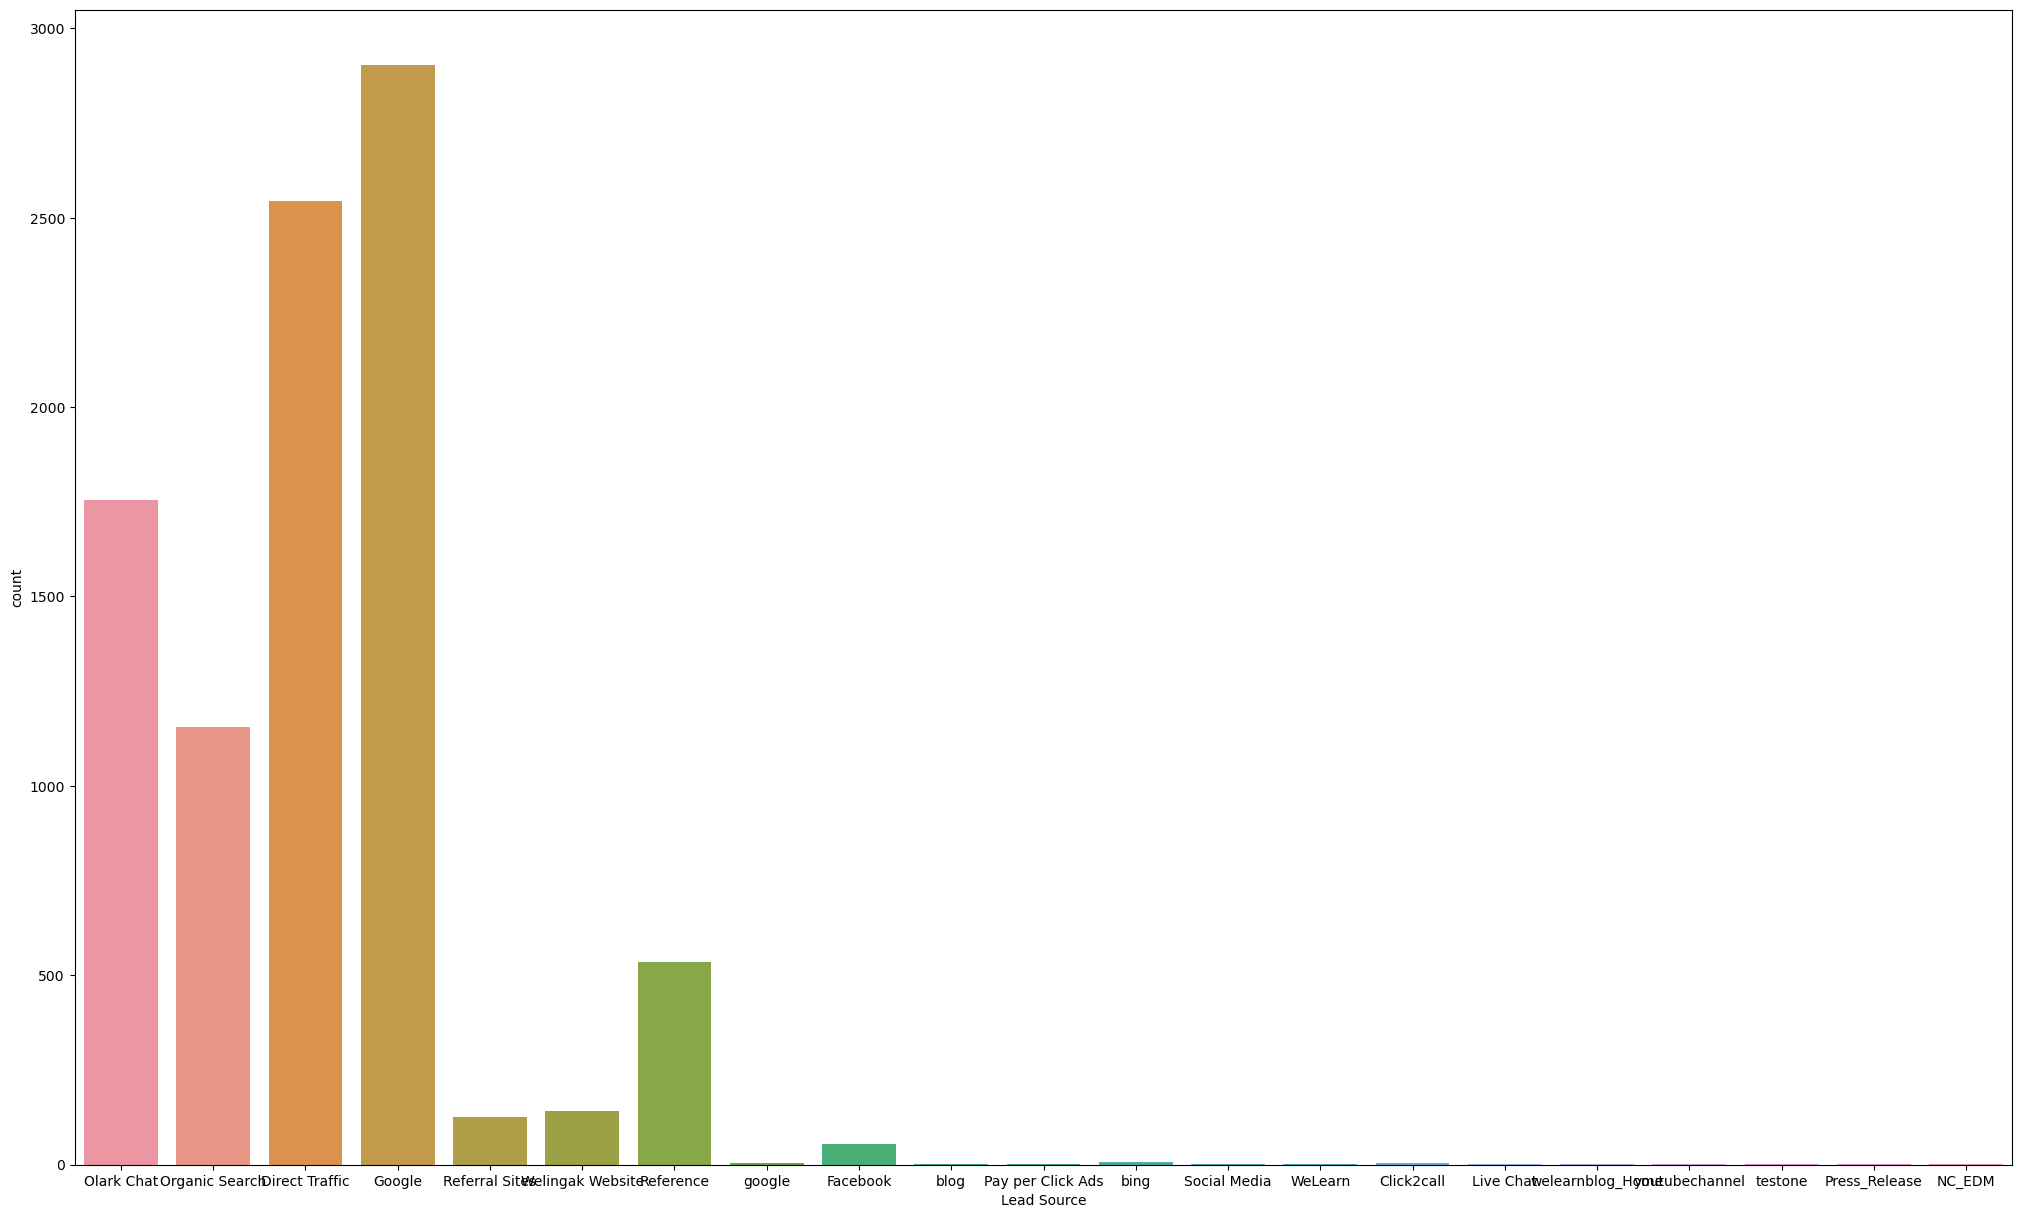

In [54]:
#Plotting the count plot to check the data distribution of "Lead Source" column after imputation.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['Lead Source'])
plt.show()

In [55]:
round(100*lead_data.isnull().sum()/len(lead_data),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The

In [56]:
#Checking the value counts of TotalVisits  column
lead_data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

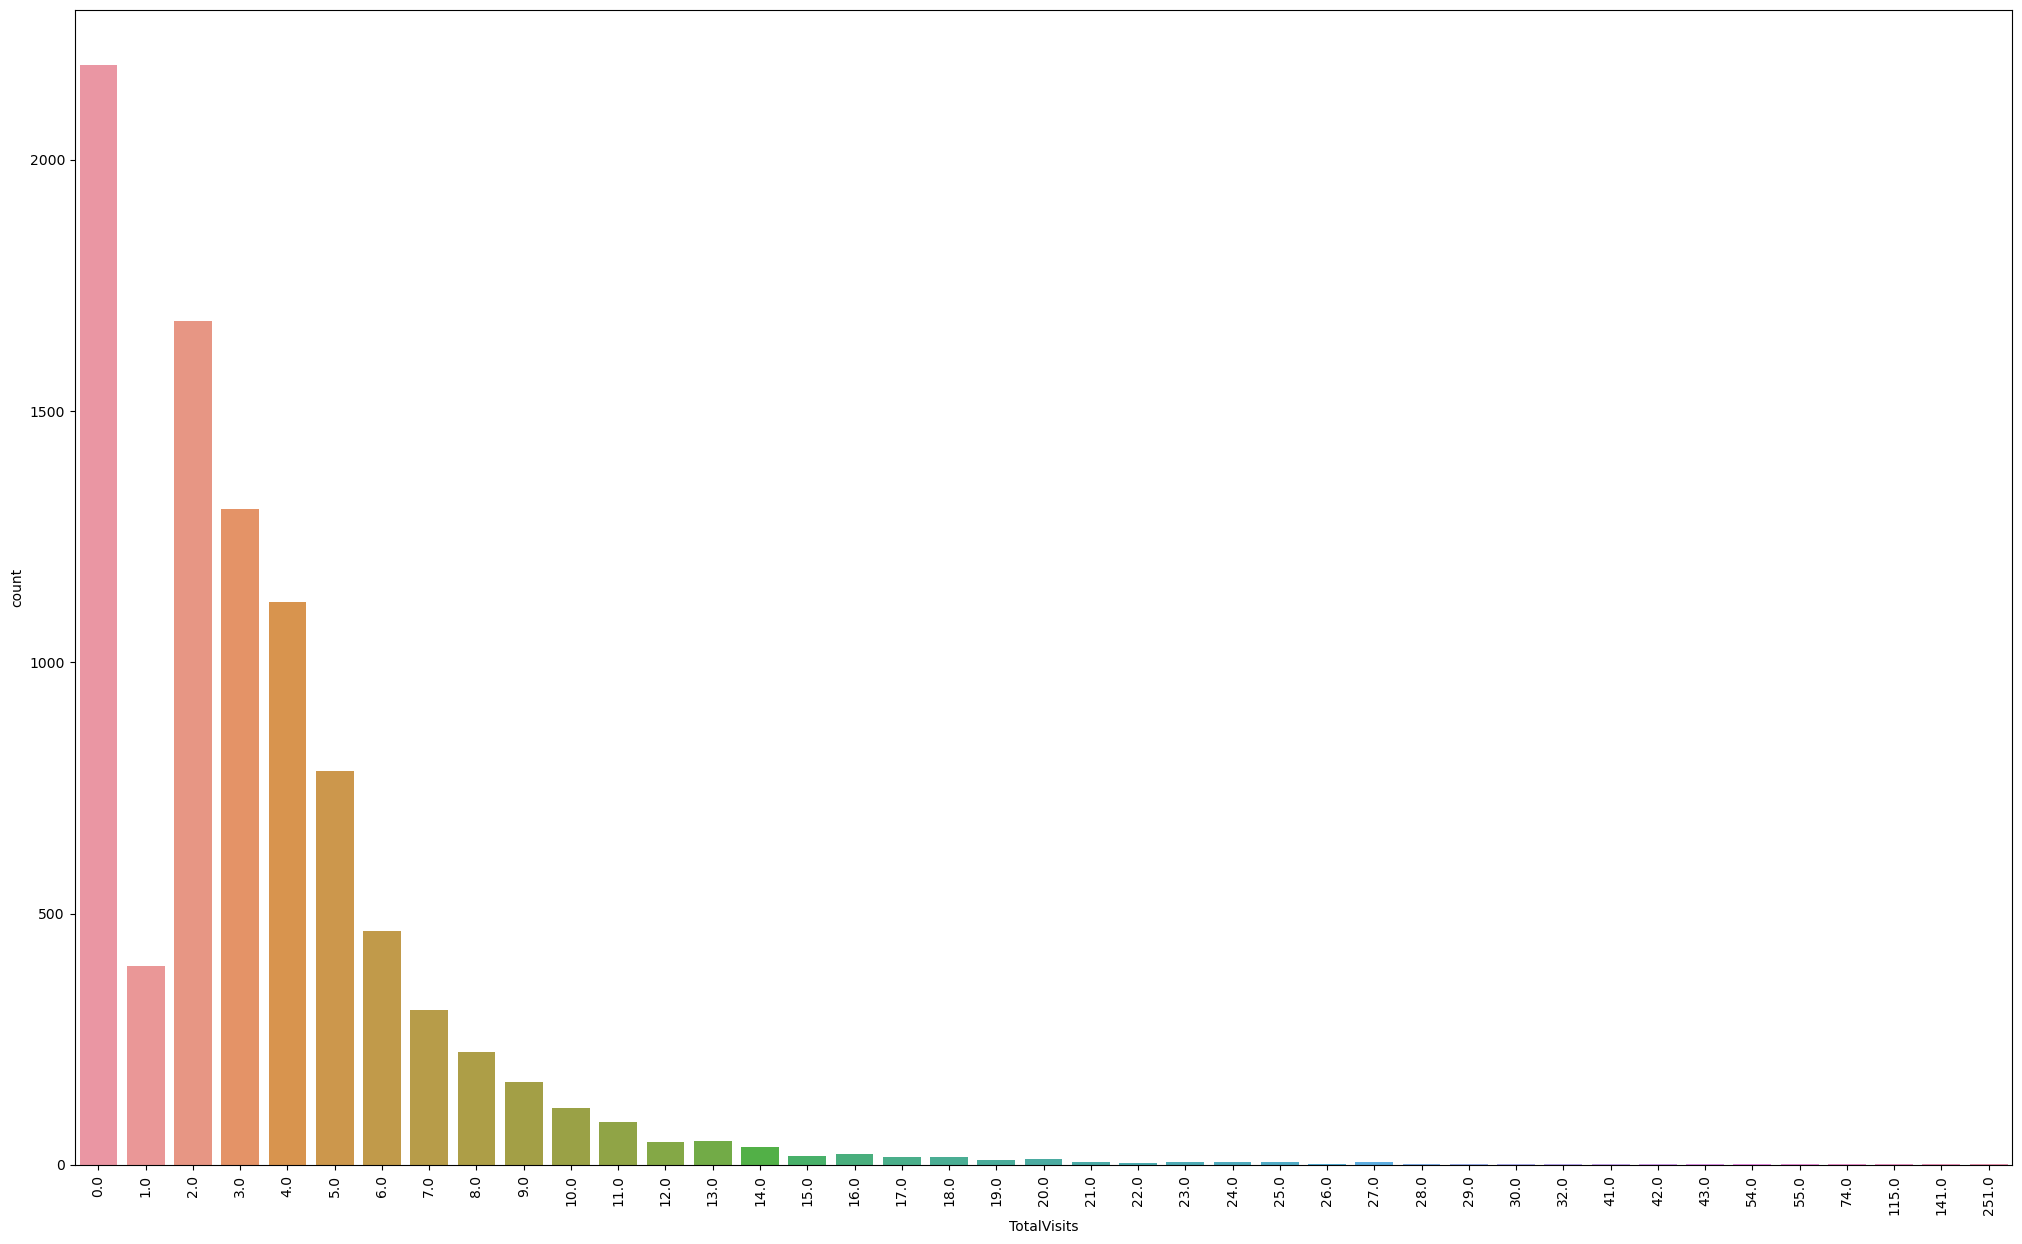

In [57]:
#Plotting the count plot to check the data distribution of "TotalVisits" column.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['TotalVisits'])
plt.xticks(rotation = 90)
plt.show()

#### Observation :  
We observe that maximum leads have not visited, followed by 2,3,4,5,6 visits.But we cannot impute missing values with 0, which is the most frequent value. So imputing missing value with median for this numerical column

In [58]:
#Imputing missing values with "median"
lead_data['TotalVisits'].fillna(lead_data['TotalVisits'].median(),inplace=True)
lead_data


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other,Better Career Prospects,No,No,No,No,No,No,No


In [59]:
lead_data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

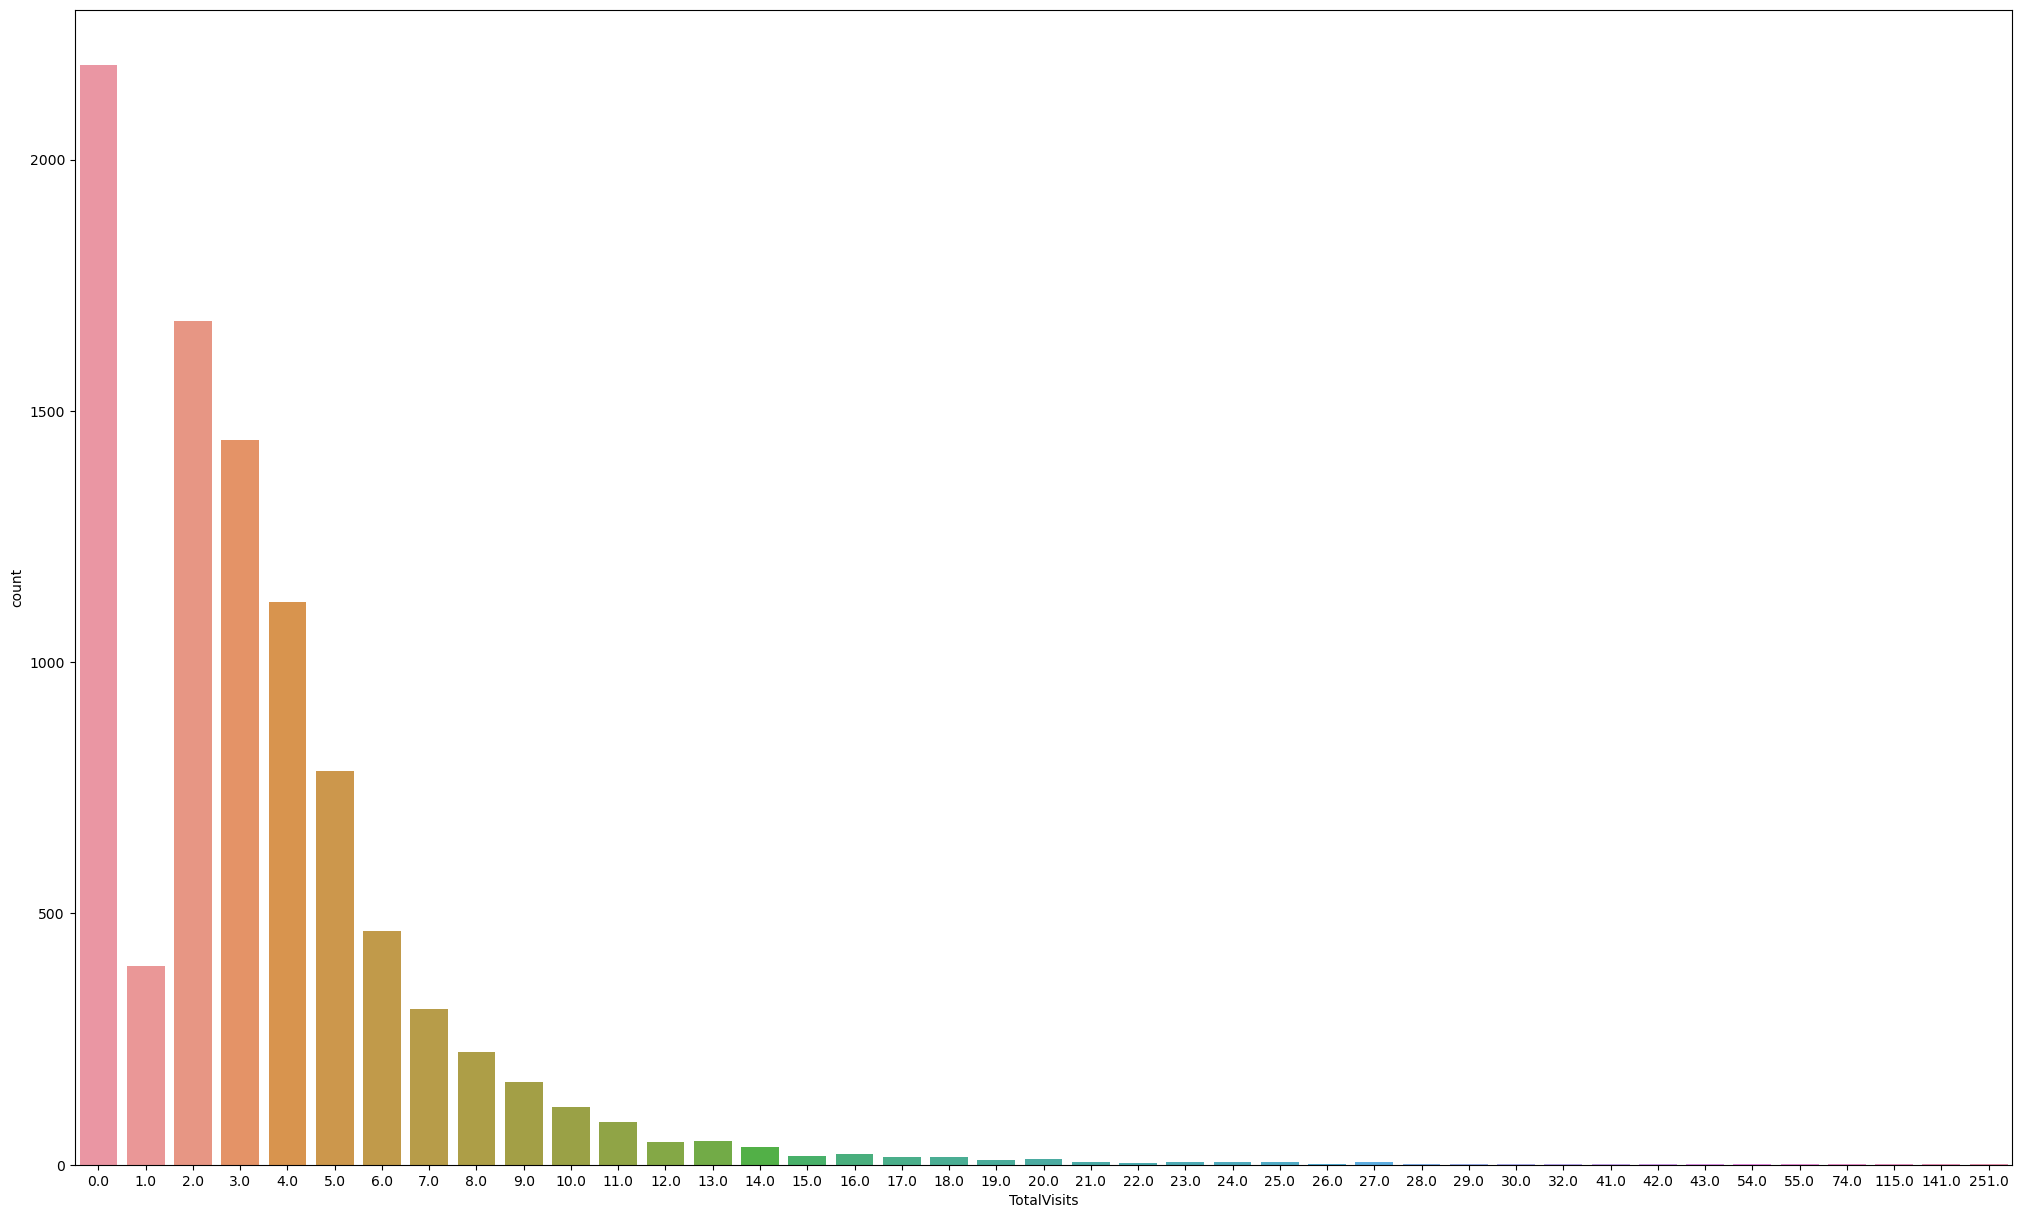

In [60]:
#Plotting the count plot to check the data distribution of "TotalVisits" column after imputation.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['TotalVisits'])
plt.show()

In [61]:
round(100*lead_data.isnull().sum()/len(lead_data),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The

In [62]:
#Checking the value counts of Page Views Per Visit  column
lead_data['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

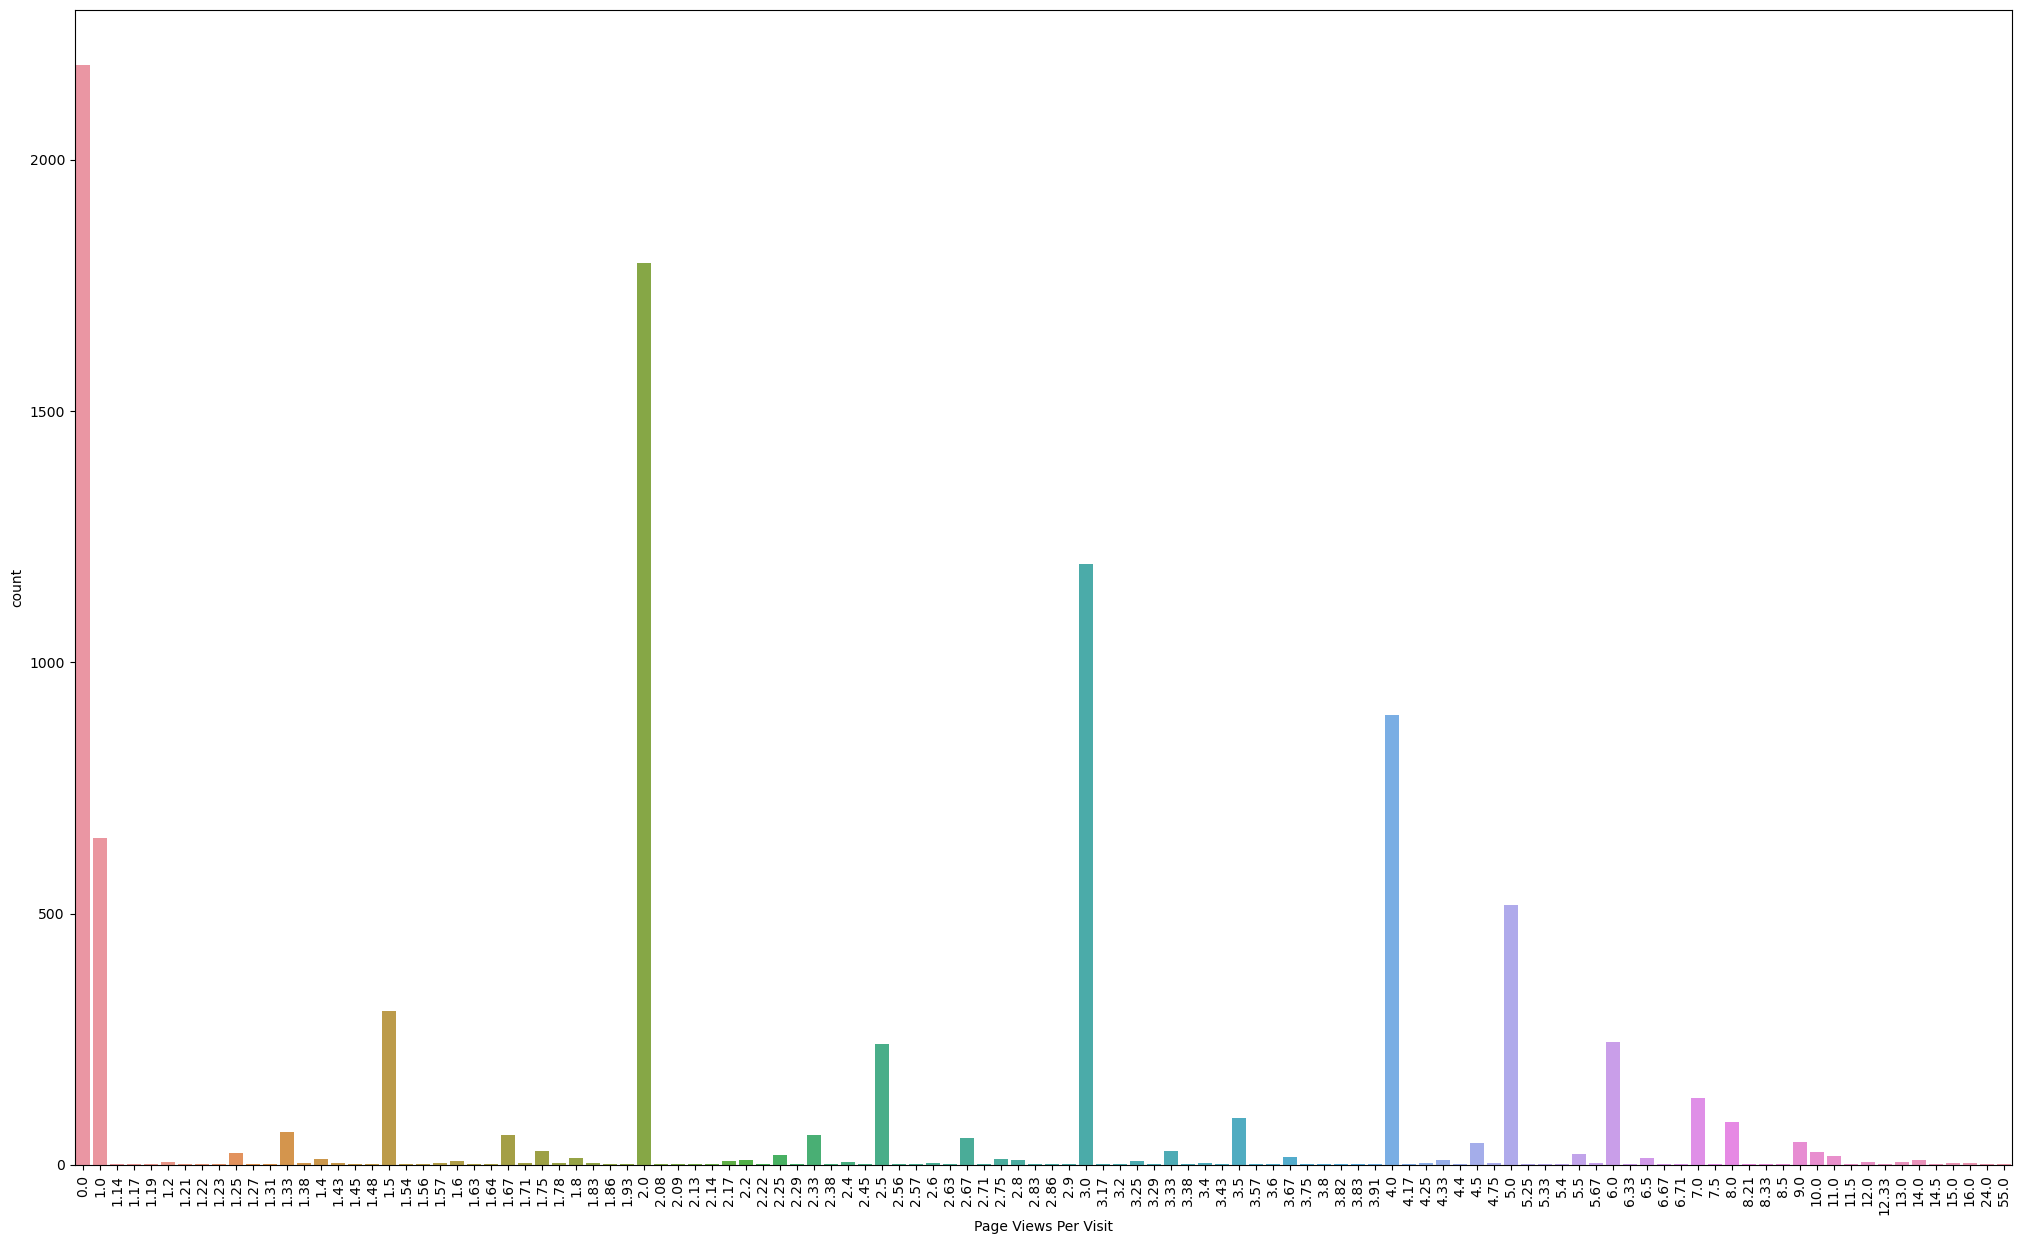

In [63]:
#Plotting the count plot to check the data distribution of "Page Views Per Visit" column.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['Page Views Per Visit'])
plt.xticks(rotation = 90)
plt.show()

#### Observation :  
We observe that maximum value for page view per visit is 0.But we cannot impute missing values with 0, which is the most frequent value. So imputing missing value with median for this numerical column.

In [64]:
#Imputing missing values with "median"
lead_data['Page Views Per Visit'].fillna(lead_data['Page Views Per Visit'].median(),inplace=True)
lead_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other,Better Career Prospects,No,No,No,No,No,No,No


In [65]:
lead_data['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1932
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

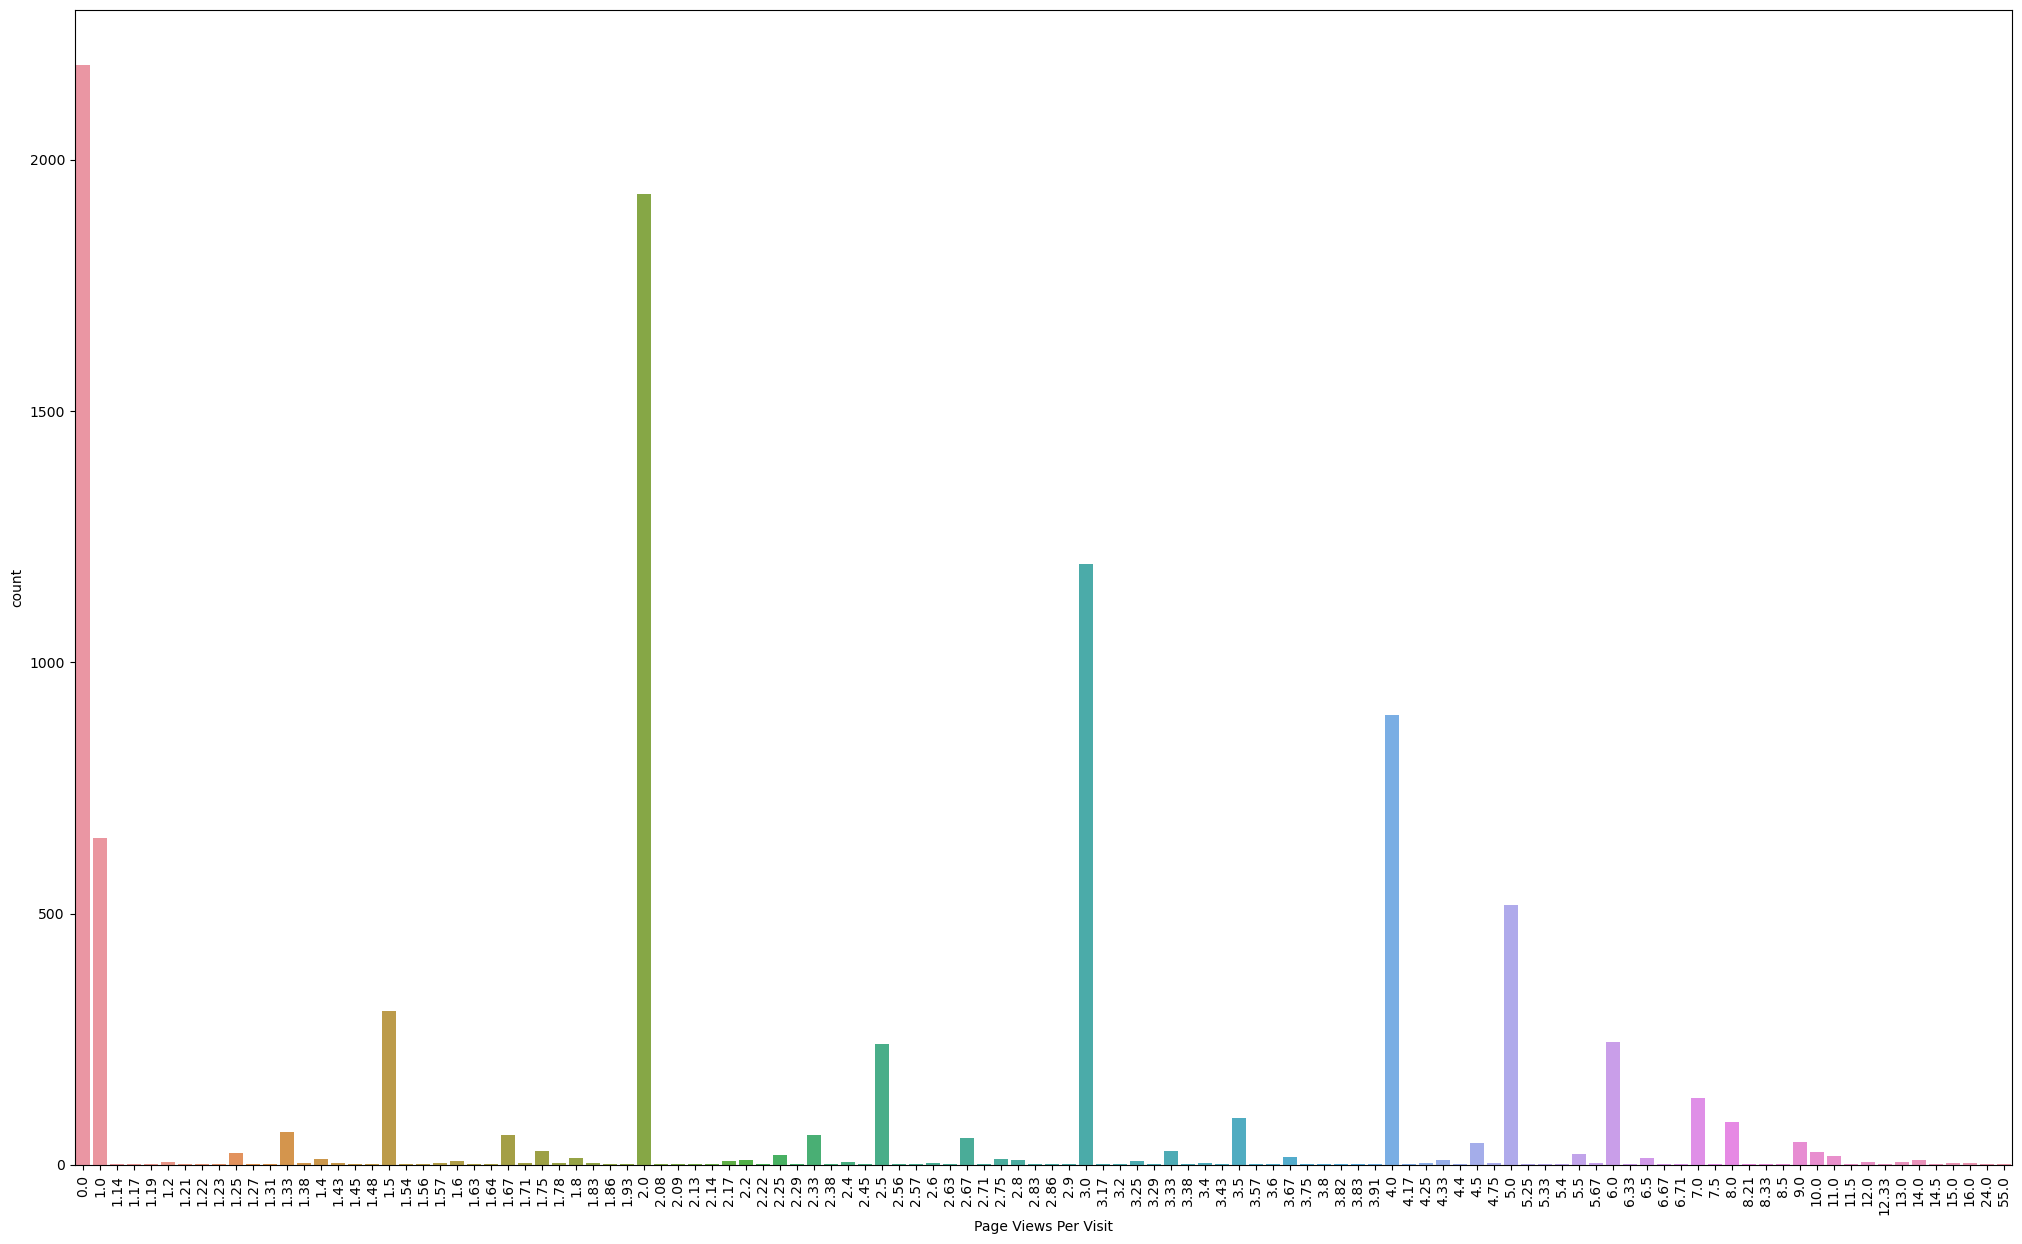

In [66]:
#Plotting the count plot to check the data distribution of "Page Views Per Visit" column after imputation.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['Page Views Per Visit'])
plt.xticks(rotation = 90)
plt.show()

In [67]:
round(100*lead_data.isnull().sum()/len(lead_data),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    1.11
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations                          0.00
A free copy of Mastering The

In [68]:
#Checking the value counts of Last Activity column
lead_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

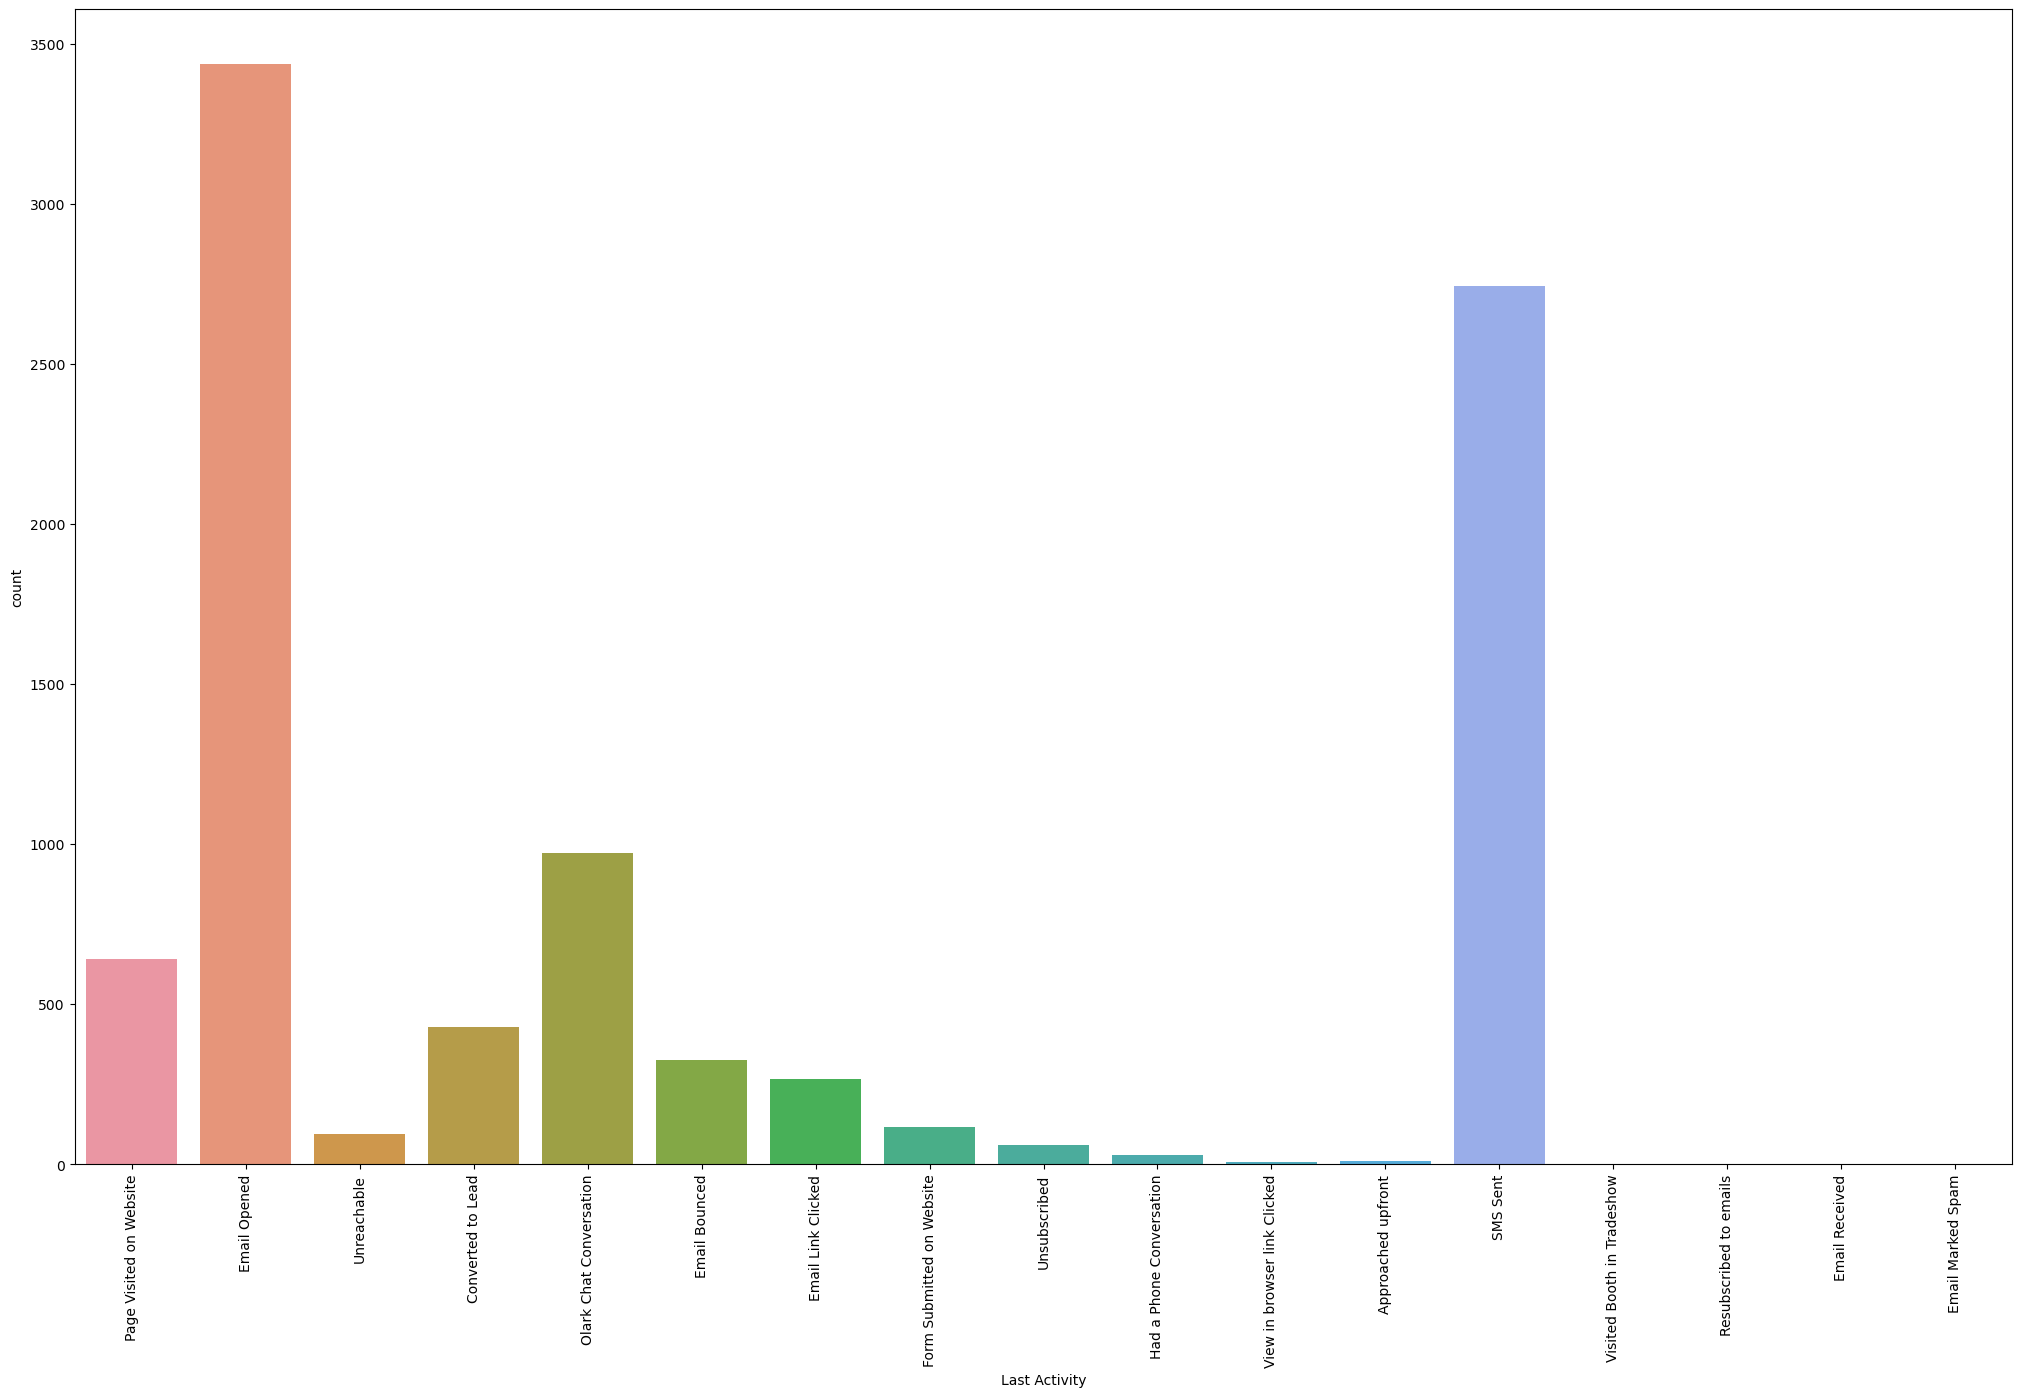

In [69]:
#Plotting the count plot to check the data distribution of "Last Activity" column.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['Last Activity'])
plt.xticks(rotation = 90)
plt.show()

#### Observation : 
Email Opened is the most frequent value and has the highest count. So we will impute the missing values with this.

In [70]:
#Imputing missing values with "Email Opened " 
lead_data['Last Activity'].fillna('Email Opened',inplace=True)
lead_data

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,Yes
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other,Better Career Prospects,No,No,No,No,No,No,No


In [71]:
lead_data['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

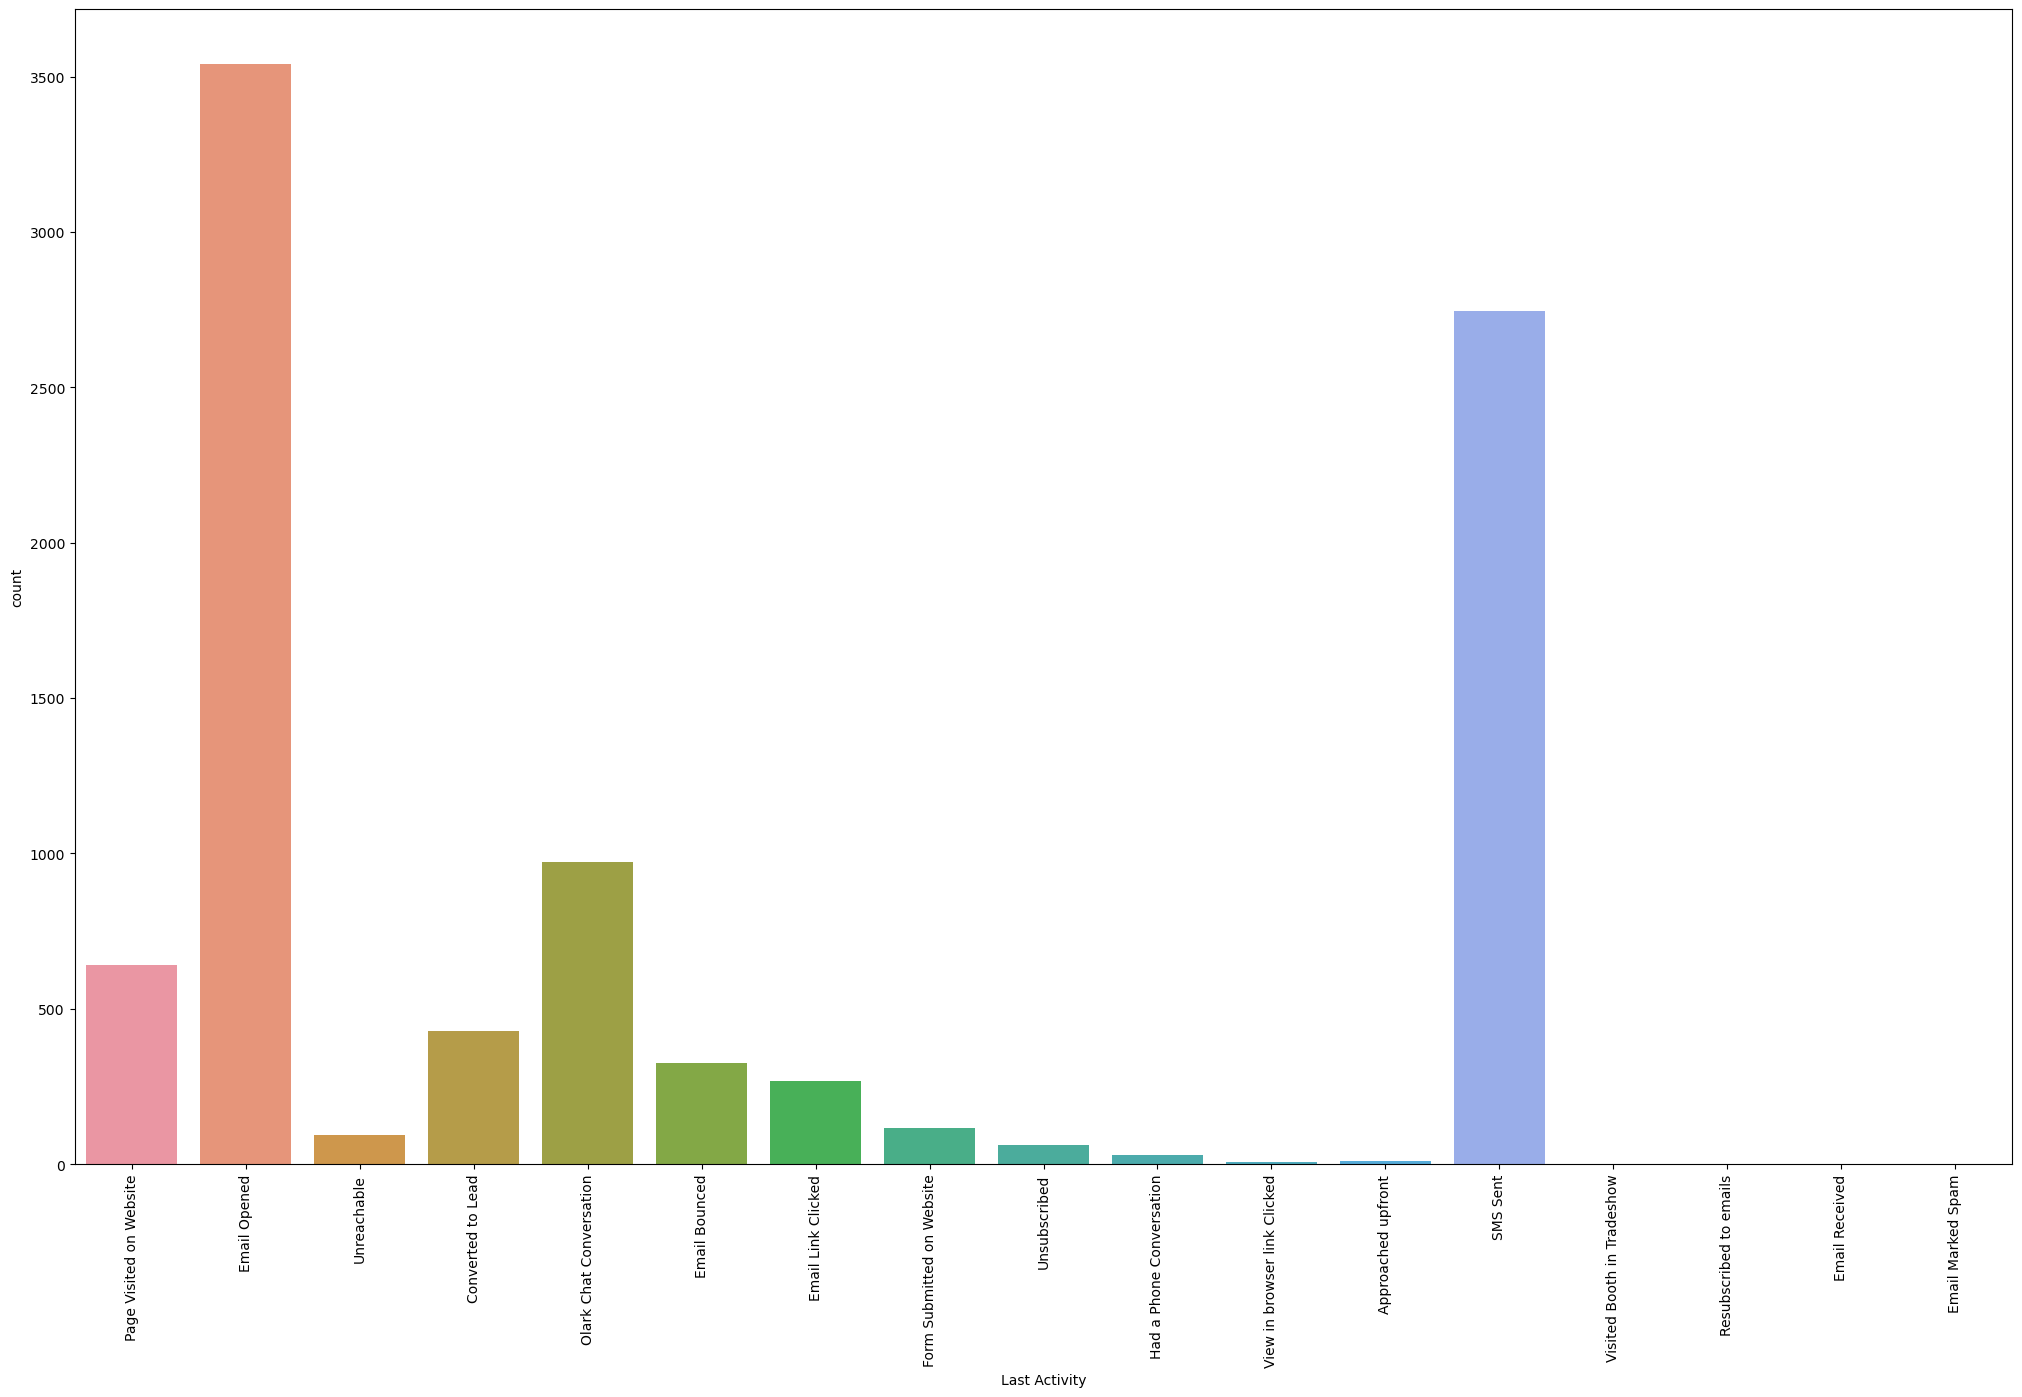

In [72]:
#Plotting the count plot to check the data distribution of "Last Activity" column after imputation.
plt.figure(figsize=(25,15))
sns.countplot(x=lead_data['Last Activity'])
plt.xticks(rotation = 90)
plt.show()

In [73]:
round(100*lead_data.isnull().sum()/len(lead_data),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                          0.0
A free copy of Mastering The Interview        

### STEP 3: Data Understanding and Imbalance percentage

In [74]:
#Checking Data balancing of all the above variables using value counts for better data understanding
cols = list(lead_data.iloc[:,:])

for i in cols:
    print(i,'---------')
    print(lead_data[i].value_counts(), '\n')

Lead Origin ---------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Lead Source ---------
Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 

Do Not Email ---------
No     8506
Yes     734
Name: Do Not Email, dtype: int64 

Do Not Call ---------
No     9238
Yes       2
Name: Do Not Call, dtype: int64 

Converted ---------


#### Observation : 
Some columns such as 'DO not call', 'What matters most to you in choosing a course', 'Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations' have imbalance data or skewed data which is insignificant for analysis point of view.The remaining variables are significant for analysis.

In [75]:
lead_data=lead_data.drop(['Do Not Call', 'What matters most to you in choosing a course', 'Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1)
lead_data

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,Others,Unemployed,No
...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,Unemployed,No
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,Yes
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,Yes
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other,No


In [76]:
#checking the shape of dataframe after removing null values
lead_data.shape

(9240, 11)

In [77]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


#### Observation : 
Now we are done with Data cleaning and we can see there is no null values present. We can proceed with Exploratory Data Analysis

# STEP 4: EDA

## Univariate Analysis

In [78]:
#Target Variable - 'Converted'
# O - Leads which are 'Not Converted' 
# 1 - Leads which are successfully 'Converted'

In [79]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Specialization                          9240 non-null   object 
 9   What is your current occupation         9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [89]:
#calculating conversion rate
Conversion_rate = sum(lead_data['Converted']/len(lead_data['Converted'].index)*100)
Conversion_rate

#len(lead_data['Converted'].index) calculates the total number of rows in the 'Converted' column in the lead_data dataframe.

38.53896103896252

In [81]:
#Checking imbalance percentage
lead_data['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

#### Observation : 
Out of 9240, 3561 i.e. Approx 38% leads are converted.

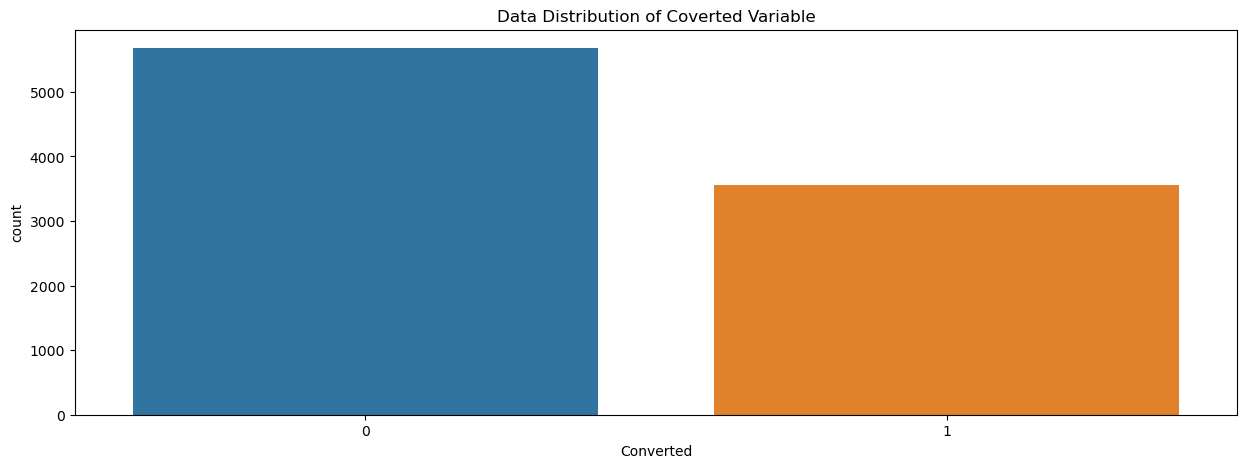

In [82]:
#Plotting the count plot to check the data distribution of "Converted" column.
plt.figure(figsize=(15,5))
sns.countplot(x=lead_data['Converted'])
plt.title('Data Distribution of Coverted Variable')
plt.show()

In [83]:
#Imbalance ratio = Converted/Non-converted
Ratio= (lead_data['Converted']==1).sum()/(lead_data['Converted']==0).sum()
Ratio

0.6270470153195985

### Analysis of Categorical Variables


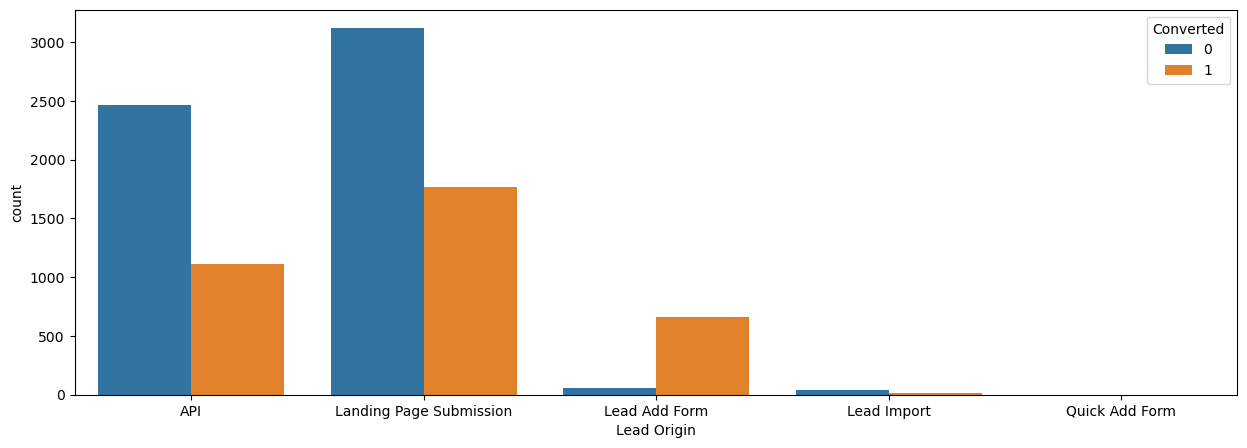

In [84]:
#Plotting count plot for 'Lead Origin' based on target variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x=lead_data['Lead Origin'], hue = 'Converted', data=lead_data)
plt.show()

In [122]:
table_lo = pd.DataFrame(pd.crosstab(index=lead_data['Lead Origin'], columns=lead_data['Converted'], margins=True, margins_name="Total"))
table_lo['val'] = table_lo[1]/table_lo['Total']*100
table_lo

Converted,0,1,Total,val
Lead Origin,,,,
API,2465,1115,3580,31.145251
Landing Page Submission,3118,1768,4886,36.185018
Lead Add Form,54,664,718,92.479109
Lead Import,42,13,55,23.636364
Quick Add Form,0,1,1,100.000000
Total,5679,3561,9240,38.538961


#### Observation : 

1). Landing Page Submission has highest number(1768)lead conversions followed by API(1115). The total count of 
    leads are also highest(4886) in Landing Page Submission
    
2). The total leads are lesser(718) in Lead Add Form but it has a good conversion rate(92%)

3). Lead Import and Quick Add Form have very less leads.

#### Recommendation : 
The number of leads are higher in Landing Page Submission and API, thus these have good chances of lead conversion. To improve overall lead conversion rate, we need to focus on improving lead conversion of these two fields.
The conversion rate is 92% in lead add form so we can generate more leads in this field.
Lead Import and Quick Add form can be ignored.

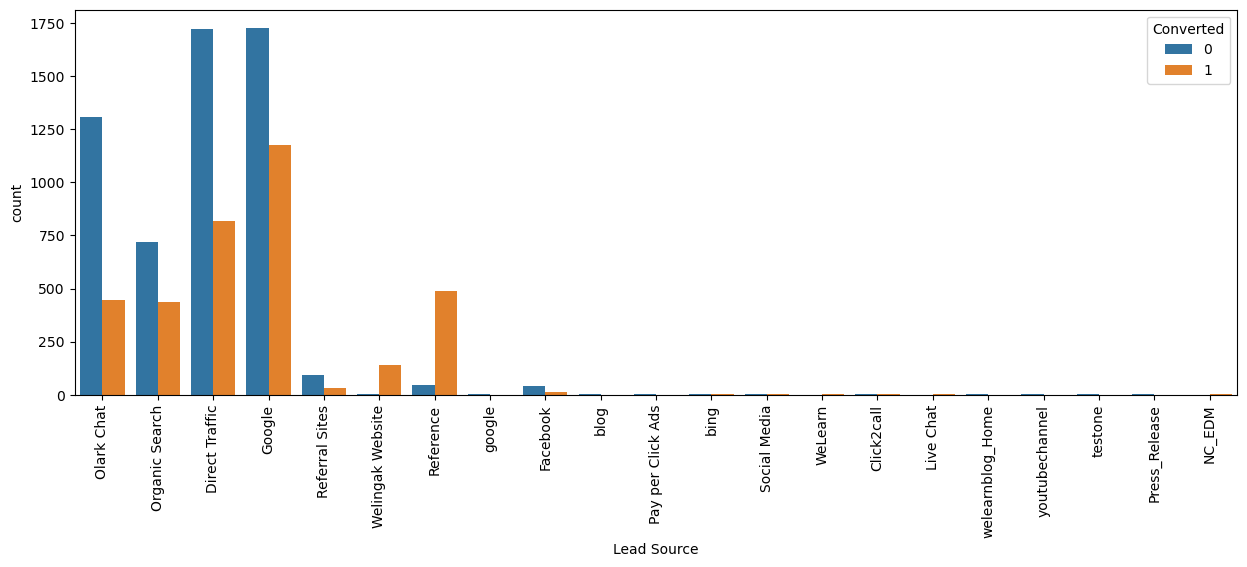

In [112]:
#Plotting count plot for 'Lead Source' based on target variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x=lead_data['Lead Source'], hue = 'Converted', data=lead_data)
plt.xticks(rotation = 90)
plt.show()

In [123]:
table_ls = pd.DataFrame(pd.crosstab(index=lead_data['Lead Source'], columns=lead_data['Converted'], margins=True, margins_name="Total"))
table_ls['val'] = table_ls[1]/table_ls['Total']*100
table_ls

Converted,0,1,Total,val
Lead Source,,,,
Click2call,1,3,4,75.000000
Direct Traffic,1725,818,2543,32.166732
Facebook,42,13,55,23.636364
Google,1728,1176,2904,40.495868
Live Chat,0,2,2,100.000000
NC_EDM,0,1,1,100.000000
Olark Chat,1307,448,1755,25.527066
Organic Search,718,436,1154,37.781629
Pay per Click Ads,1,0,1,0.000000


#### Observation : 

1). Google has highest lead conversions(1176) followed by Direct Traffic(818). The total count of leads are also highest in 
    Google=2904
    
2). The total leads are lesser(142) in Welingak Website and Reference(534) but they have a very good conversion rate 98% and 
    91% respectively.

3). Others like blog, Pay per click ads,bing, social media, Welearn, Click2call, Live chat,etc have very less or almost 0
    leads,hence 0 contribution.

#### Recommendation : 
The number of leads are higher in Google and Direct Traffic, thus these have good chances of lead conversion. To improve lead conversion rate, we need to focus on improving lead conversion of direct traffic, Google. Though the number of leads are less in Welingak Webisite and Reference but The conversion rates are good so we can generate more leads in these fields. Other fields can be ignored.

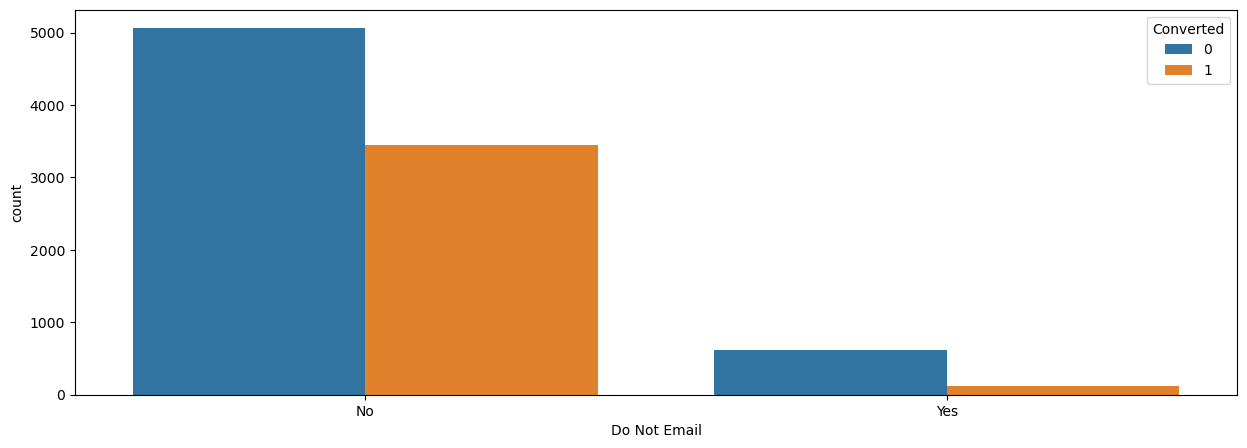

In [124]:
#Plotting count plot for 'Do Not Email' based on target variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x=lead_data['Do Not Email'], hue = 'Converted', data=lead_data)
plt.show()

In [125]:
table_dnm = pd.DataFrame(pd.crosstab(index=lead_data['Do Not Email'], columns=lead_data['Converted'], margins=True, margins_name="Total"))
table_dnm['val'] = table_dnm[1]/table_dnm['Total']*100
table_dnm

Converted,0,1,Total,val
Do Not Email,,,,
No,5063,3443,8506,40.477310
Yes,616,118,734,16.076294
Total,5679,3561,9240,38.538961


#### Observation : 
Leads who opted for getting mail are more(8506) and who dont want to get  mails are less(734). The conversion rate is comparatively higher(40%=3443) for people opted for mail option.

#### Recommendtion : 
We can improve the mail quality. The mail should be more informative, convincing, clear and well communicated. It will increase chances of more lead conversion.

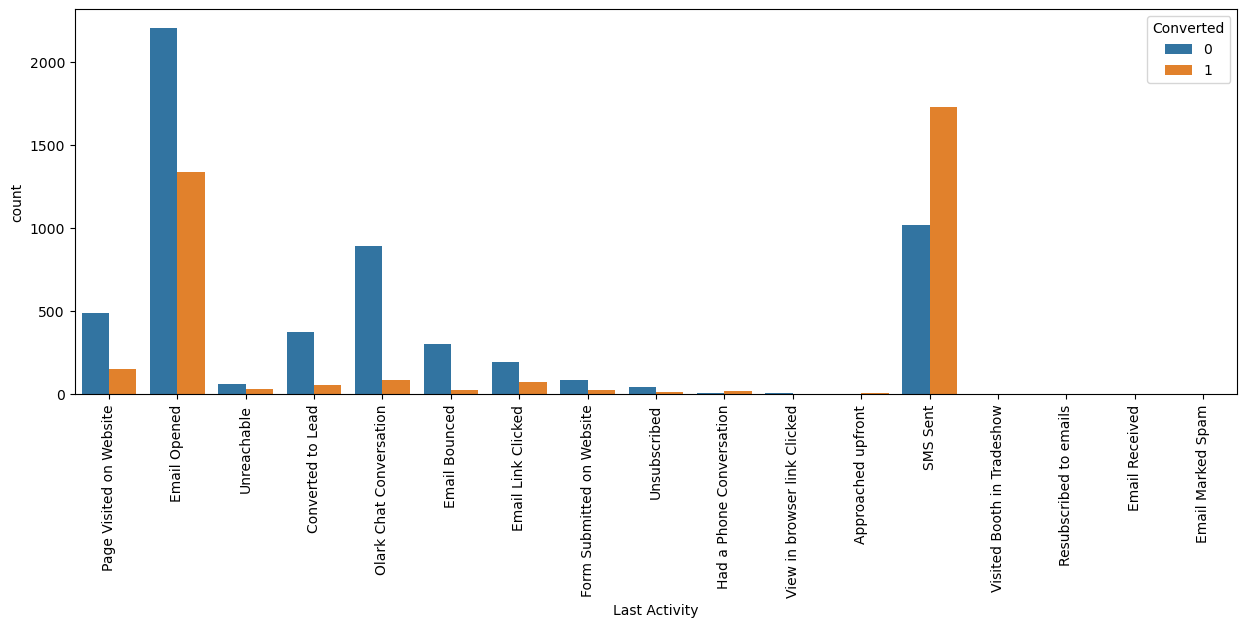

In [126]:
#Plotting count plot for 'Last Activity' based on target variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x=lead_data['Last Activity'], hue = 'Converted', data=lead_data)
plt.xticks(rotation = 90)
plt.show()

In [127]:
table_la = pd.DataFrame(pd.crosstab(index=lead_data['Last Activity'], columns=lead_data['Converted'], margins=True, margins_name="Total"))
table_la['val'] = table_la[1]/table_la['Total']*100
table_la

Converted,0,1,Total,val
Last Activity,,,,
Approached upfront,0,9,9,100.000000
Converted to Lead,374,54,428,12.616822
Email Bounced,300,26,326,7.975460
Email Link Clicked,194,73,267,27.340824
Email Marked Spam,0,2,2,100.000000
Email Opened,2206,1334,3540,37.683616
Email Received,0,2,2,100.000000
Form Submitted on Website,88,28,116,24.137931
Had a Phone Conversation,8,22,30,73.333333


#### Observation : 

1). SMS sent has highest number of lead conversions(1727) followed by Email Opened(1334). The total count of leads are highest(3540) in Email Opened.

2). Others like had a phone conversation, view in browser link  clicked, resubdcribed to emails etc have almost 0 leads,hence 0 contribution.

#### Recommendation : 
We should focus on increase in reach of SMS to maximum aspirants.

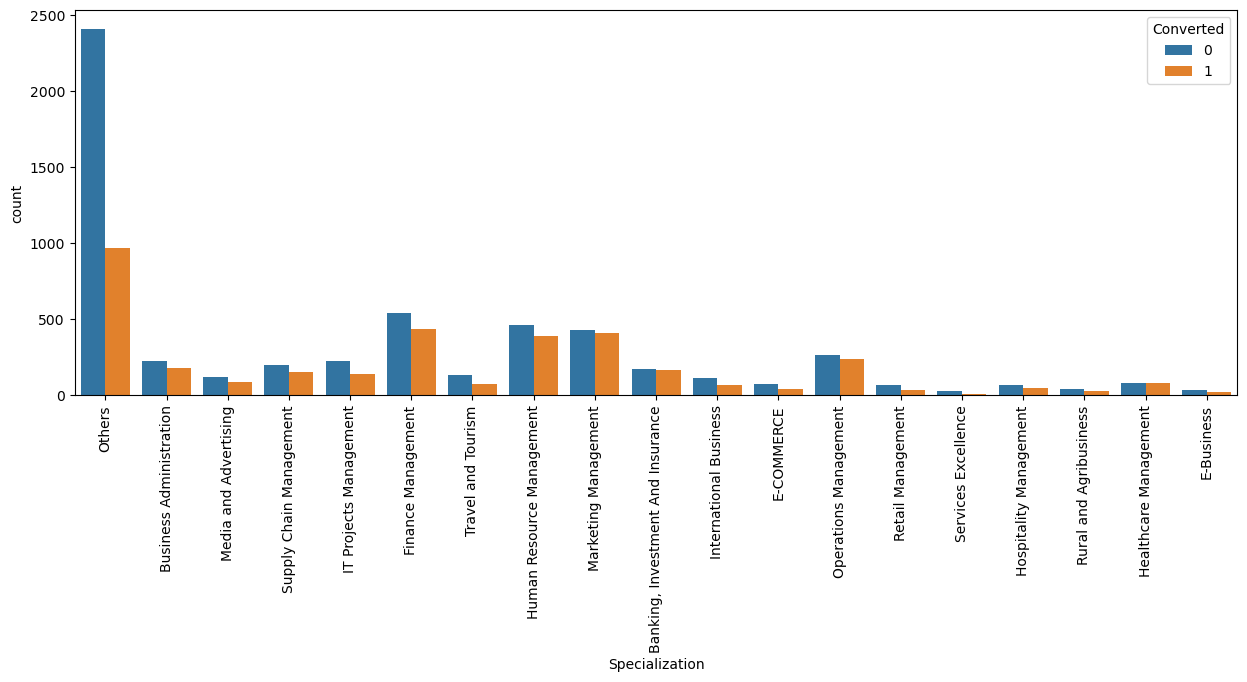

In [128]:
#Plotting count plot for 'Specialization' based on target variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x=lead_data['Specialization'], hue = 'Converted', data=lead_data)
plt.xticks(rotation = 90)
plt.show()

In [129]:
table_sp = pd.DataFrame(pd.crosstab(index=lead_data['Specialization'], columns=lead_data['Converted'], margins=True, margins_name="Total"))
table_sp['val'] = table_sp[1]/table_sp['Total']*100
table_sp

Converted,0,1,Total,val
Specialization,,,,
"Banking, Investment And Insurance",171,167,338,49.408284
Business Administration,224,179,403,44.416873
E-Business,36,21,57,36.842105
E-COMMERCE,72,40,112,35.714286
Finance Management,540,436,976,44.672131
Healthcare Management,80,79,159,49.685535
Hospitality Management,66,48,114,42.105263
Human Resource Management,460,388,848,45.754717
IT Projects Management,226,140,366,38.251366


#### Observation : 

1). Others is generating maximum number of leads(3380) with good highest conversions(969).Followed by Finance(436), 
    Marketing(408), Human Resource(388)
    
2). In Healthcare, the number of leads converted and not converted is almost equal(79)

3). Overall management has similar trends across all the field, generating quality leads and conversion.

#### Recommendation : 
We should focus on each specialization as it is one of the important aspect of lead conversion.

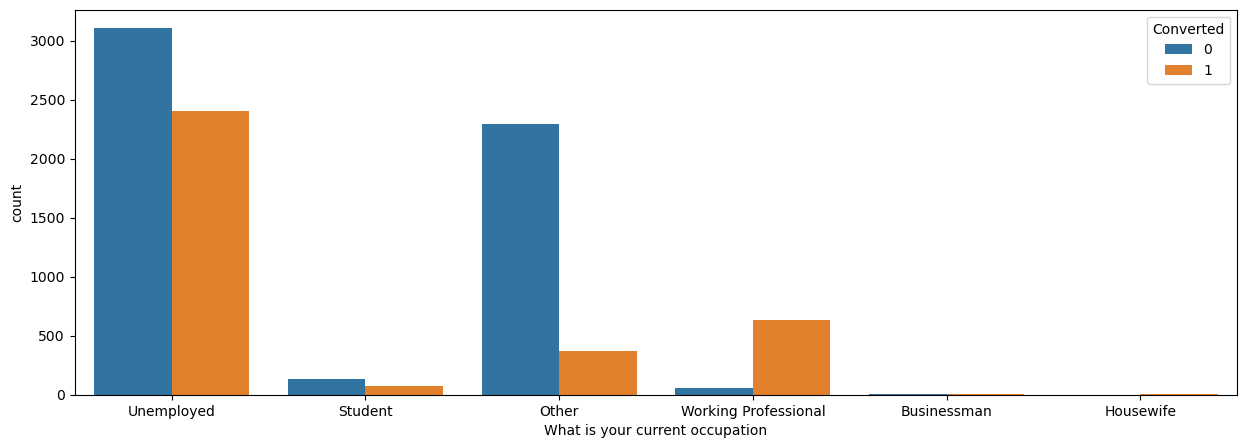

In [145]:
#Plotting count plot for 'What is your current occupation' based on target variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x=lead_data['What is your current occupation'], hue = 'Converted', data=lead_data)
plt.show()

In [131]:
table_co = pd.DataFrame(pd.crosstab(index=lead_data['What is your current occupation'], columns=lead_data['Converted'], margins=True, margins_name="Total"))
table_co['val'] = table_co[1]/table_co['Total']*100
table_co

Converted,0,1,Total,val
What is your current occupation,,,,
Businessman,3,5,8,62.500000
Housewife,0,10,10,100.000000
Other,2326,380,2706,14.042868
Student,132,78,210,37.142857
Unemployed,3159,2441,5600,43.589286
Working Professional,59,647,706,91.643059
Total,5679,3561,9240,38.538961


#### Observation : 

1). Unemployed has highest lead conversions = 2441

2). Working Professional has less number of total leads(706) but a very good conversion rate(91%)

3). Other is also contributing in conversion.

#### Recommendation : 
Unemployed will be more willing to take a course, hence we should focus on Unemployed for more lead conversion.

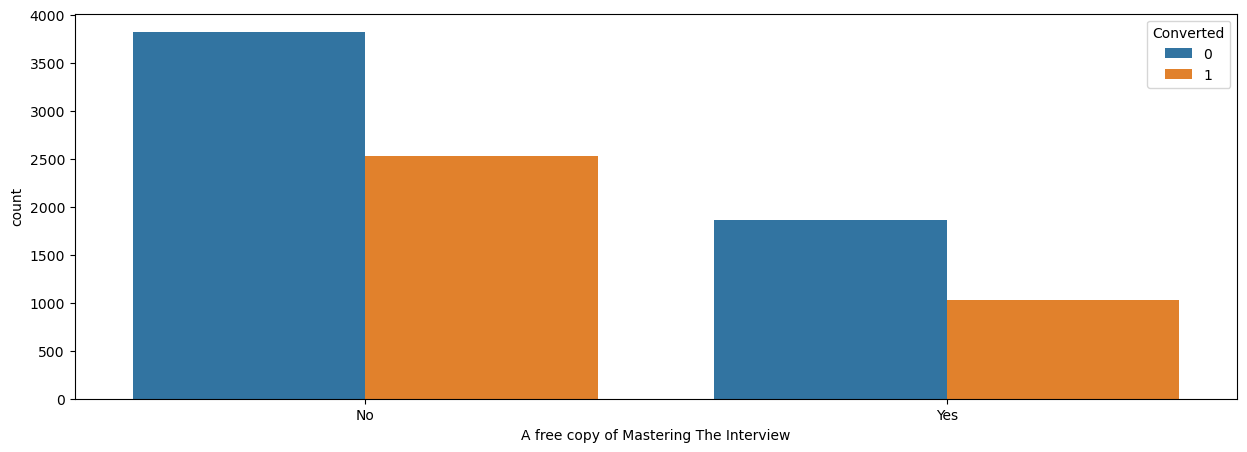

In [132]:
#Plotting count plot for 'A free copy of Mastering The Interview' based on target variable 'Converted'
plt.figure(figsize=(15,5))
sns.countplot(x=lead_data['A free copy of Mastering The Interview'], hue = 'Converted', data=lead_data)
plt.show()

In [133]:
table_fcmi = pd.DataFrame(pd.crosstab(index=lead_data['A free copy of Mastering The Interview'], columns=lead_data['Converted'], margins=True, margins_name="Total"))
table_fcmi['val'] = table_fcmi[1]/table_fcmi['Total']*100
table_fcmi

Converted,0,1,Total,val
A free copy of Mastering The Interview,,,,
No,3821,2531,6352,39.845718
Yes,1858,1030,2888,35.664820
Total,5679,3561,9240,38.538961


## Analysis of Numerical Variables

### Outlier Treatment And Analysis

In [134]:
#checking percentile values for all the above numerical variables.
lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000


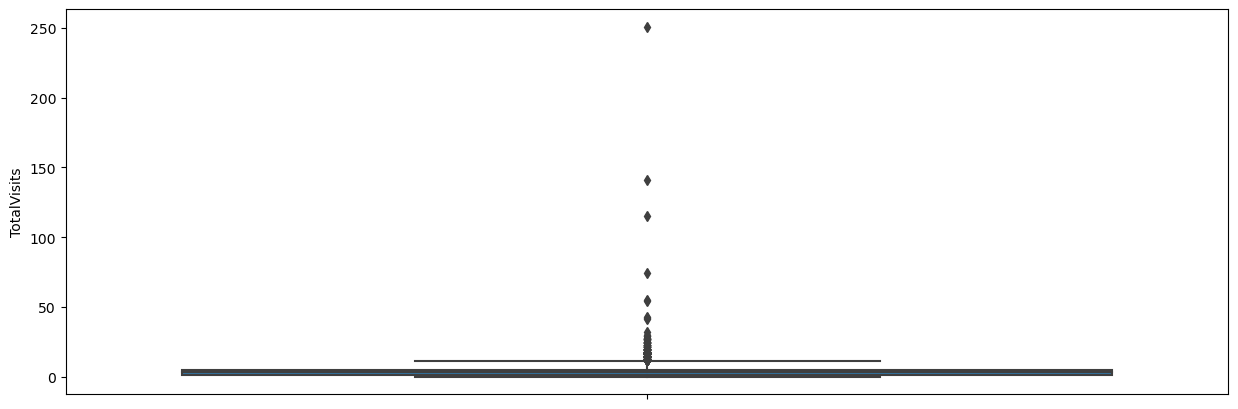

In [135]:
#Plotting the boxplot to check the data distribution of "TotalVisits" column.
plt.figure(figsize=(15,5))
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

In [136]:
table_tv = pd.DataFrame(pd.crosstab(index=lead_data['TotalVisits'], columns=lead_data['Converted'], margins=True, margins_name="Total"))
table_tv['val'] = table_tv[1]/table_tv['Total']*100
table_tv

Converted,0,1,Total,val
TotalVisits,,,,
0.0,1273,916,2189,41.845592
1.0,335,60,395,15.189873
2.0,1143,537,1680,31.964286
3.0,857,586,1443,40.609841
4.0,672,448,1120,40.000000
5.0,467,316,783,40.357599
6.0,288,178,466,38.197425
7.0,187,122,309,39.482201
8.0,121,103,224,45.982143


#### Observation : 
The box plot shows that some upper range outliers are present. We need to treat these outliers.

Total visits =0 has highest number of leads=2189 and lead conversions = 916. Higher total visits have a slighter higher chance of  being a promising lead.


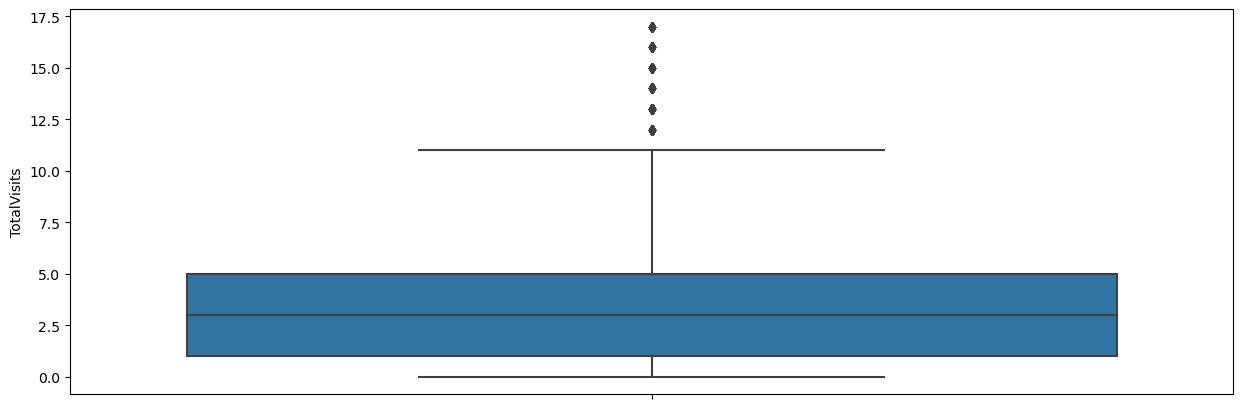

In [137]:
#Outlier treatment for Total Visits -removing upper range outliers by capping upper range to 0.99
Q3 =lead_data['TotalVisits'].quantile(0.99)
lead_data = lead_data[(lead_data['TotalVisits']<=Q3)]
plt.figure(figsize=(15,5))
sns.boxplot(y=lead_data['TotalVisits'])
plt.show()

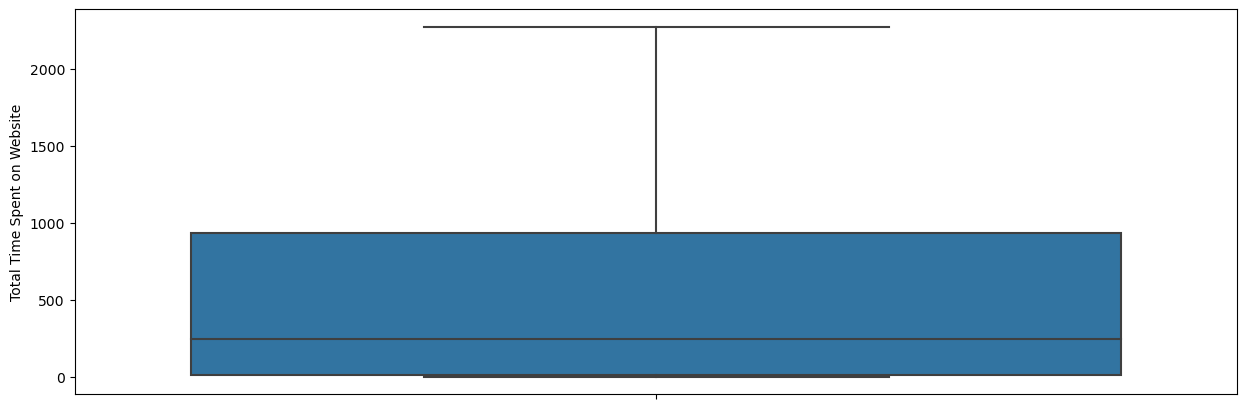

In [138]:
#Plotting the boxplot to check the data distribution of "Total Time Spent on Website" column.
plt.figure(figsize=(15,5))
sns.boxplot(y=lead_data['Total Time Spent on Website'])
plt.show()

In [139]:
table_tsow = pd.DataFrame(pd.crosstab(index=lead_data['Total Time Spent on Website'], columns=lead_data['Converted'], margins=True, margins_name="Total"))
table_tsow['val'] = table_tsow[1]/table_tsow['Total']*100
table_tsow

Converted,0,1,Total,val
Total Time Spent on Website,,,,
0,1277,916,2193,41.769266
1,4,3,7,42.857143
2,13,1,14,7.142857
3,7,2,9,22.222222
4,10,0,10,0.000000
...,...,...,...,...
2217,0,1,1,100.000000
2226,1,0,1,0.000000
2253,0,1,1,100.000000


#### Observation : 
The box plot shows that there are no outliers present.No treatment is required.

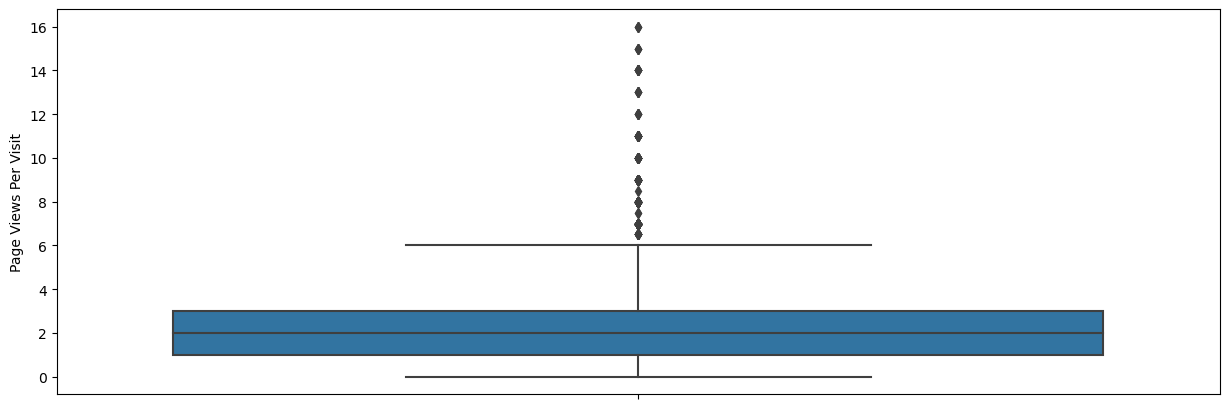

In [140]:
#Plotting the boxplot to check the data distribution of "Page Views Per Visit" column.
plt.figure(figsize=(15,5))
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

In [141]:
table_pv = pd.DataFrame(pd.crosstab(index=lead_data['Page Views Per Visit'], columns=lead_data['Converted'], margins=True, margins_name="Total"))
table_pv['val'] = table_pv[1]/table_pv['Total']*100
table_pv

Converted,0,1,Total,val
Page Views Per Visit,,,,
0.0,1273,916,2189,41.845592
1.0,472,179,651,27.496160
1.14,0,1,1,100.000000
1.17,0,1,1,100.000000
1.2,4,1,5,20.000000
...,...,...,...,...
13.0,4,1,5,20.000000
14.0,3,6,9,66.666667
15.0,3,1,4,25.000000


#### Observation:
The box plot shows that some upper range outliers are present. We need to treat these outliers.

In [142]:
lead_data.shape

(9157, 11)

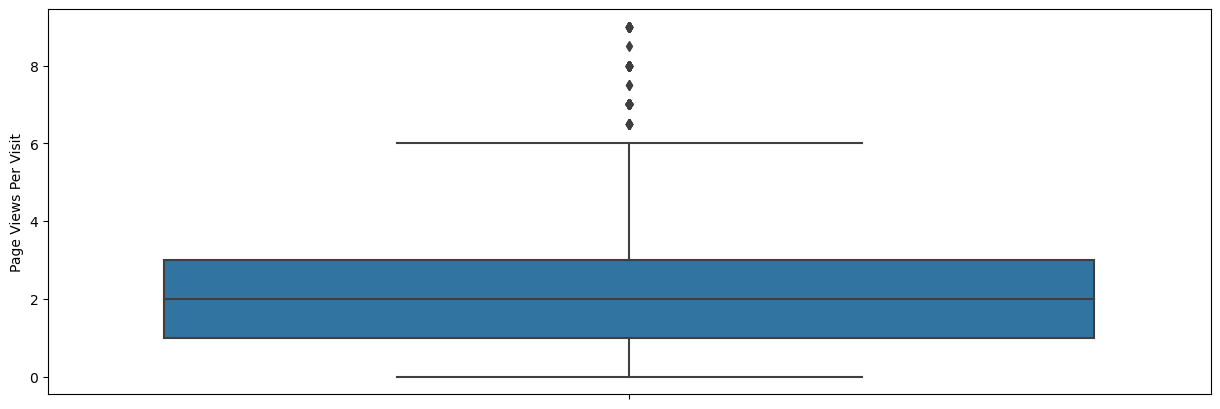

In [143]:
#Outlier treatment for Page Views Per Visit -removing upper range outliers by capping upper range to 0.99
Q3 =lead_data['Page Views Per Visit'].quantile(0.99)
lead_data = lead_data[(lead_data['Page Views Per Visit']<=Q3)]
plt.figure(figsize=(15,5))
sns.boxplot(y=lead_data['Page Views Per Visit'])
plt.show()

In [144]:
lead_data.shape

(9090, 11)

### Bivariate Analysis

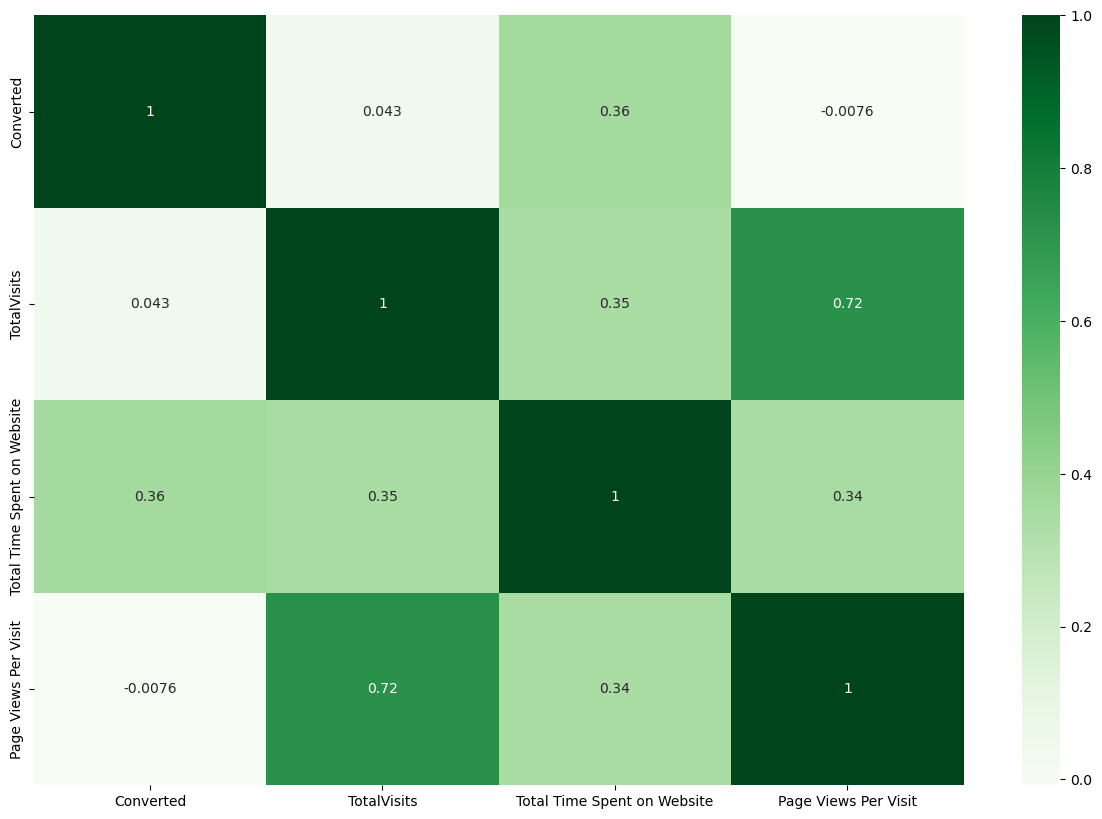

In [146]:
#checking correlations of numerical variables using heatmap:-

plt.figure(figsize = (15,10))        
ax = sns.heatmap(lead_data.corr(),annot = True,cmap='Greens')

#### Observation : 
There is high correlation between TotalVisits and page Views per visit i.e. 0.72

The correlation between Total Time spent on website and Converted is 0.36

The correlation coefficient is very less for Total Visits and converted is 0.043 and Page views per visit and converted is -0.0076

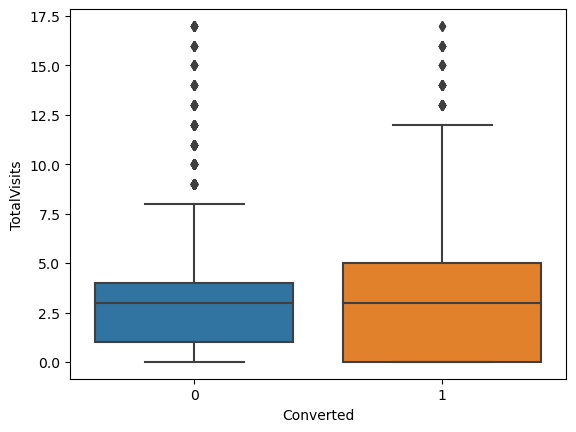

In [147]:
#comparing box plot of Total Visits vs Converted variable
sns.boxplot(y=lead_data['TotalVisits'], x= 'Converted', data = lead_data)
plt.show()

#### Observation : 
Higher total visits have a slighter higher chance of  being a promising lead. The median of both converted and non converted is close.

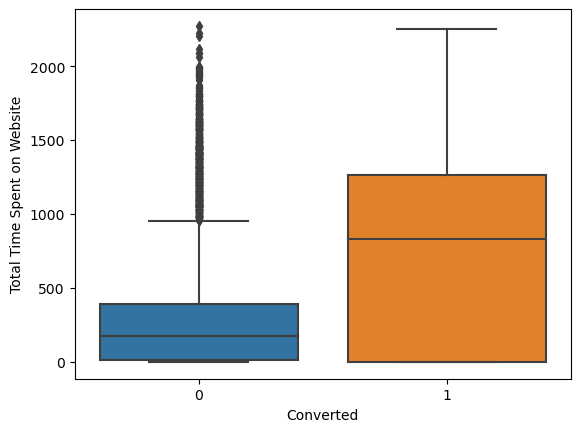

In [148]:
#comparing box plot of Total Time Spent on Website vs Converted variable
sns.boxplot(y=lead_data['Total Time Spent on Website'], x= 'Converted', data = lead_data)
plt.show()

#### Observation : 
The conversion rate of leads spending time on webiste is really high.

#### Recommendation : 
We should find more ways to engage aspirants on website and spend more time and get more information and beneficial courses.

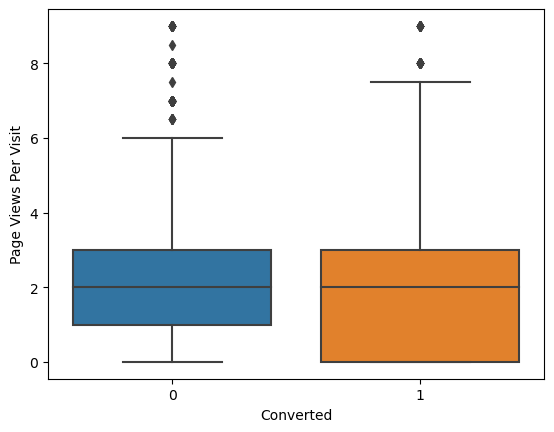

In [149]:
#comparing box plot of Total Time Spent on Website vs Converted variable
sns.boxplot(y=lead_data['Page Views Per Visit'], x= 'Converted', data = lead_data)
plt.show()

#### Observation :  
The median of both converted and non converted is close.

## STEP 5: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [150]:
# List of variables to map
varlist =['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes':1, 'No':0 })

# Applying the function to the variable list
lead_data[varlist] = lead_data[varlist].apply(binary_map)

In [151]:
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy_var = pd.get_dummies(lead_data[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation']],drop_first = True)
dummy_var

In [ ]:
# Adding the results to the master dataframe
lead_data = pd.concat([lead_data,dummy_var],axis = 1)
lead_data.head()

#### Dropping the repeated variables

In [ ]:
# We have created dummies for the below variables, so we can drop them
lead_data = lead_data.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation'], axis=1)
lead_data

In [ ]:
lead_data.shape

In [ ]:
lead_data.info()

Now we have all numeric variables

## Step 6: Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
X = lead_data.drop(['Converted'],axis=1)
X.head()

In [ ]:
# Putting feature variable to X
y = lead_data['Converted']
y.head()

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
#checking the shape of X_train
X_train.shape

In [ ]:
#checking the shape of X_test
X_test.shape

In [ ]:
lead_data.info()

## Step 7: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

In [ ]:
#Heatmap to understand the attributes correlation
plt.figure(figsize=(20,30))

sns.heatmap(lead_data.corr(), annot =True, cmap = 'YlGnBu')
plt.show()

In [ ]:
#There are lots of variables, hence this correlation matrix is not giving clear picture of correlation coefficients.Still we have some observations:
#'Pages view per visit' and 'total visits' have a high correlation.
#'Lead source facebook' and 'lead origin lead import' have a very high correlation.
#'Lead source reference' and 'lead origin lead add form' have a high correlation.
#'Do not email' and 'last activity email bounced' have a good correlation.

## Step 8: Model Building using stats model


In [ ]:
#importing 'Logistic Regression' from scikit learn
from sklearn.linear_model import LogisticRegression

#creating logistic regression object -Regressor
regressor = LogisticRegression()

### Feature selection using RFE 

In [ ]:
from sklearn.feature_selection import RFE

# running RFE with 15 variables as output
#Regressor is used to evaluate the importance of each feature.
rfe = RFE(regressor,n_features_to_select=15)

#fitting the rfe instance to the training data
rfe = rfe.fit(X_train, y_train)

In [ ]:
#This indicated which features are selected.
rfe.support_

In [ ]:
#displaying the list of feature names, whether it is selected by RFE and their ranking. Lower ranking has more importance.
#here the zip func is used to combine 3 lists taking element with the same index from the list and create into tuples
list(zip(X_train.columns, rfe.support_ , rfe.ranking_))

In [ ]:
#storing the list of selected columns by RFE
col = X_train.columns[rfe.support_]
col

In [ ]:
#displaying the list of columns which are not selected by RFE.
X_train.columns[~rfe.support_]

#### Assessing the model with StatsModels -  using manual feature selection
#### Running Your First Training Model

In [ ]:
#importing statsmodel library
import statsmodels.api as sm

### Model 1

In [ ]:
#logistic regression model

#adding a constant term to a feature matrix X_train[col]
X_train_sm = sm.add_constant(X_train[col])

#building first model
logm1 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm1.fit ()

#summary of logistic regression model
res.summary()


### Check for VIF
It measures how much the variance of the estimated regression coefficients increases if  predictors are correlated.
The VIF values help assess the presence of multicollinearity among the features in a multiple linear regression model.

In [ ]:
## Check for the VIF values of the feature variables.

#importing Vif from library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif =pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

#### Observation : The VIF values are fine, but the p-value of What is your current occupation_Housewife is very high 0.999, so we need to drop this column

In [ ]:
#dropping 'What is your current occupation_Housewife' column
col = col.drop(["What is your current occupation_Housewife"],1)
col

### Model 2

In [ ]:
X_train_sm = sm.add_constant(X_train[col])

#building second model
logm2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit ()
res.summary()

In [ ]:
#calculating VIF for new model
vif =pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

#### Observation : The VIF values are fine, but the p-value of Last Activity_Had a Phone Conversation =0.022, so we need to drop this column

In [ ]:
#dropping 'Last Activity_Had a Phone Conversation' column
col = col.drop(["Last Activity_Had a Phone Conversation"],1)
col

### Model 3

In [ ]:
X_train_sm = sm.add_constant(X_train[col])

#building third model
logm3 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res = logm3.fit ()
res.summary()

In [ ]:
#calculating VIF for third model
vif =pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

#### Observation : In this third model , all the p-values are less that is significant and VIF values are less than 3. So this can be observed as the final model. Now we can proceed further for making predictions.

## STEP 9  : Making Predictions on Train Set

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10] #displaying 10 values

In [ ]:
# reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [ ]:
#creating a dataframe with actual and predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final

In [ ]:
#adding 'Prospect ID' for indexing
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [ ]:
y_train_pred_final['Predicted'] =y_train_pred_final.Converted_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

## STEP 10: Model Evaluation

### Confusion Matrix

In [ ]:
#importing metrics library
from sklearn import metrics

In [ ]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
#importing library to plot confusion matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#plotting confusion matrix
sns.heatmap(confusion,annot= True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show

In [ ]:
# Actual/Predicted     not_converted   converted
 # not_converted        3497            438
 # converted            715             1713  

In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

### Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting conversion rate when leads have not converted.
print(FP/ float(TN+FP))

In [ ]:
# positive predictive value 
TP / float(TP+FP)


In [ ]:
# Negative predictive value
TN / float(TN+ FN)

## STEP 11: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
def draw_roc( actual, probs ):  #actual: True labels.probs: Predicted probabilities.
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False ) #drop_intermediate=False: This parameter ensures that all thresholds are returned, not just those that are necessary for a monotonically increasing ROC curve.
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))  #new figure with a specified size of 5x5 inches.
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score ) 
    #%0.2f is a placeholder that will be replaced by the actual value of auc_score
    #ROC curve (area = 0.85)example 0.2 means 1 digit before decimal and 2 digits after decimal
    #% operator is used for string formatting, and it takes the value on the right (auc_score) and formats it according to the specifier on the left (%0.2f).
    plt.plot([0, 1], [0, 1], 'k--') #adds a diagonal dashed line from the bottom-left corner to the top-right corner.
    plt.xlim([0.0, 1.0]) #These lines set the x-axis and y-axis limits, ensuring that the ROC curve and the diagonal line fit within the specified range.
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob) 
#we are giving the actual Converted values and the respective Converted Probabilities to the curve.

#### Observation : 
ROC curve value should be close to 1 and we are getting value as 0.89. This shows it is a good predictive model.

## Step 12: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.
We have chosen arbitrary cut off value of 0.5, probability above 0.5 as 1 and below 0.5 as 0.
Now we need to find the best cut off value for the model.

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    #It compares the actual values (y_train_pred_final.Converted) with the predicted values at the current cutoff point (y_train_pred_final[i]).
    total1=sum(sum(cm1))
    #This line calculates the total number of observations in the confusion matrix by summing all its elements.
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    #This line calculates the accuracy by dividing the sum of the diagonal elements (correct predictions) by the total number of observations.
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

#The key takeaway from this code is the accuracy, sensitivity, and specificity values 

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y =['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size = 8)
plt.show()

In [ ]:
#To determine the exact cutoff point on the plot, lets add vertical line 
cutoff_df.plot.line(x='prob', y =['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size = 8)
plt.axvline(x=0.357,color='r',linestyle = '--')
plt.show()

#### Observation :
From the plotted curve, we have found 0.357 as the best optimal cutoff point.


In [ ]:
#calculating final predicted based on converted probability with cutoff point=0.357
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.357 else 0)

y_train_pred_final.head()

### Assigning lead  score to the leads based on prediction

In [ ]:
y_train_pred_final['Lead Score']=y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
#plotting confusion matrix
sns.heatmap(confusion2,annot= True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity or TPR  of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting conversion when leads are not converted
FP/ float(TN+FP)

In [ ]:
# Positive predictive value 
TP / float(TP+FP)

In [ ]:
# Negative predictive value
TN / float(TN+ FN)

## Precision and Recall

In [ ]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

##### Precision
TP / TP + FP

In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

#### Recall
TP / TP + FN

In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

 Using sklearn utilities for the same

In [ ]:
#importing 'precision score' and 'recall score'
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

#### Observation :
We can see that the model is performing well.The values for the train data set:

###### Accuracy       = 80%
###### Sensitivity    = 80%
###### Specificity    = 81%
###### Precison       = 72%
###### Recall         = 80%
###### ROC Curve      = 0.89
###### Optimal Cutoff = 0.357

Here, the precision- recall values and sensitivity-specificity values dont have much difference. So in this case, we can say that precision- recall view and sensitivity-specificity view, any view is good.Whatever view we select might give different interpretations for the same model. It is completely up to us which view we choose to take while building a logistic regression model.

### Precision and recall tradeoff

In [ ]:
#importing library for precision-recall curve
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
p, r, thresholds

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size = 8)
plt.show()

In [ ]:
#To determine the exact cutoff point on the plot, lets add vertical line 
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size = 8)
plt.axvline(x=0.43,color='b',linestyle = '--')
plt.show()

#### Observation :
From the plotted curve, we have found 0.43 as the best optimal cutoff point for precision-recall curve.

In [ ]:
#calculating final predicted based on converted probability with precision- recall cutoff point=0.43
y_train_pred_final['final_predicted2'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

In [ ]:
y_train_pred_final['Lead Score2']=y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

In [ ]:
# Let's check the overall accuracy again
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

In [ ]:
#plotting confusion matrix
sns.heatmap(confusion2,annot= True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity or TPR  of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting conversion when leads are not converted
FP/ float(TN+FP)

In [ ]:
# Positive predictive value 
TP / float(TP+FP)

In [ ]:
# Negative predictive value
TN / float(TN+ FN)

In [ ]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

In [ ]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

#### Observation : 



With precision recall curve cutoff= 0.43, there is only slight change in values of precision and recall.Rest all values are same.
With 0.357, precision = 72% and recall = 80%
With 0.43, precision= 76% and recall = 75%
Though precision is increased, but recall/sensitivity is decreased for this point. To increase sensitivity, we will use optimal cut off point =0.357

## Step 13: Making predictions on the test set

In [ ]:
#scaling test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

In [ ]:
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

#Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [ ]:
## Checking top 10 rows
y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
#adding 'Prospect ID' for indexing
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]
y_pred_final.head()

In [ ]:
#assigning lead score
y_pred_final['Lead Score']=y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head()

In [ ]:
#calculating final predicted based on converted probability with cutoff point=0.357
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.357 else 0)

y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

In [ ]:
#plotting confusion matrix
sns.heatmap(confusion2,annot= True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity or TPR  of our logistic regression model
TP / float(TP+FN)

In [ ]:
# Let us calculate specificity
TN / float(TN+FP)

In [ ]:
# Calculate false postive rate - predicting conversion when leads are not converted
FP/ float(TN+FP)

In [ ]:
# Positive predictive value 
TP / float(TP+FP)

In [ ]:
# Negative predictive value
TN / float(TN+ FN)

In [ ]:
#precision
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

In [ ]:
#recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

#### Observation :
We can see that the model is performing well for test data as well.The values for the test data set:

###### Accuracy       = 80%
###### Sensitivity    = 80%
###### Specificity    = 80%
###### Precison       = 72%
###### Recall         = 80%

All the values are similar to train data set.

### With the above analysis and model building, we can say that the model is performing very well and can predict the conversion rate.


## Final Observation 

In [ ]:
# Train Dataset
# Accuracy = 80%
# Sensitivity = 80%
# Specificity = 81%
# Precison = 72%
# Recall = 80%
# ROC Curve = 0.89
# Optimal Cutoff = 0.357¶

In [ ]:
# Test Dataset
# Accuracy = 80%
# Sensitivity = 80%
# Specificity = 80%
# Precison = 72%
# Recall = 80%
